# <a id='toc1_'></a>[SPEARHEAD VDA tool](#toc0_)

The tool receives a list of time references and outputs the corresponding plots derived from the VDA analysis based on user input.

*The notebook cells are meant to be run serially. In cases where this is not applicable, the user is warned and instructed beforehand via the markdown cells.*

## <a id='toc1_1_'></a>[Imports & Setup](#toc0_)

The "Imports & Setup" section imports dependencies used throughout the tool and also indirectly defines constants and default values.

In [1]:
from warnings import simplefilter, filterwarnings
from pandas.errors import PerformanceWarning
from astropy.visualization import quantity_support

from vda_tool_configuration import VDA_parameters
from vda_views import VDA_nb_displayer
from vda import VDA

# omit Pandas' PerformanceWarning
simplefilter(action='ignore', category=PerformanceWarning)
filterwarnings(action='ignore', message="Discarding nonzero nanoseconds in conversion")

The SPEARHEAD VDA tool relies on three classes: (a) VDA, (b) VDA_parameters, and (c) VDA_nb_displayer.

The first one holds the core functions of the VDA tool, the second one stores the parameters under which the VDA calculations are made, while the third contains functions that help with the notebook vidualizations

In [2]:
vda_parameters = VDA_parameters()
vda_displayer = VDA_nb_displayer(vda_parameters)
vda = VDA(vda_parameters)

## <a id='toc1_2_'></a>[Parameterize](#toc0_)

This section parameterizes the notebook. The user should run the code cells one at a time, change the variables as they desire, and proceed to the next when the input fields are properly filled.

In each cell there is a brief description for the asked inputs.

After each form group the adjusted variables are displayed when the immediately next cell(s) run(s).

*Note: In case prior input needs to be changed, all the input cells after the changed one shall be rerun to avoid inconsistencies.*

### <a id='toc1_2_6_'></a>[Views/Displays](#toc0_)

- Display the produced DataFrames: this should be checked to display the affected variables/DataFrames

In [3]:
vda_displayer.display_view_toggle()

Checkbox(value=True, description='Display the produced DataFrames', style=CheckboxStyle(description_width='ini…

### <a id='toc1_2_1_'></a>[Event time(s)](#toc0_)

There are three options for the gathering of the events' data.
- Custom datetime range: provide a starting and an ending date for the data collection. An event should start between these dates for the calculations tobe meaningful
- File with datetime ranges: same concept as the above, but for multiple events. Each line should have a starting and an ending datetime (see `examples/datetime_range_example.csv` file)
- File with reference datetimes: A file containing a list of datetimes (see `examples/reference_times_example.csv` file). Two extra parameters are defined to define a datetime range (see next Markdown cell)

In [4]:
vda_displayer.display_input_type()

Dropdown(description='How the events will be provided:', options=(('Custom datetime range (1 event)', 0), ('Fi…

(Applicable only if *File with reference datetimes* is selected)

The reference datetimes and the rest of the parameters of this section define the time window for which to download particle data.

- Reference times file: the path to the file which states the reference datetimes. This must be a .csv file with 2 columns. The first column is an `id` for the reference (event), while the second column is the reference datetime itself. The datetime format should be any format that is supported by the `pandas.to_pydatetime` function (i.e. 2024-12-31 00:00:00). The first line of the .csv file should be the headers, although the names of the headers don't matter to the rest of the tool.

- Hours prior to the reference time: an integer indicating hours **before** the reference datetime. The derived datetime is the **start** of the time window for the particle data download.

- Hours after the reference time: an integer indicating hours **after** the reference datetime. The derived datetime is the **end** of the time window for the particle data download.

In [5]:
vda_displayer.display_date_range()

In [6]:
vda.construct_times_df()

Start Time            End Time
1 2022-01-20 05:00:00 2022-01-20 23:45:00

### <a id='toc1_2_2_'></a>[Particle Data](#toc0_)

There is an option to load arleady downloaded data. In case the user has a proper .pkl file (outputted by this notebook) and wants to load the data from it, the "Load data" checkbox should be checked.

- In case of "Load data" the user should provide the path to the .pkl file

- In case of a run with new data: the user should state if he wants the data to be saved by checking the "Save data" checkbox and providing a path for the outputted file. The path should state a .pkl file to be created.

In [7]:
vda_displayer.display_load_data_option()

Checkbox(value=False, description='Load data')

In [8]:
vda_displayer.display_save_data_option()

The user should check the sensor/particle species combinations and viewings of the data to be downloaded.
- Resample frequency: the frequency for the data to be resampled. This should be provided as an **offset alias**. [Reference](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases) for instructions and examples.

**Important Note: In case of data load the checked items and frequency should match the loaded dataset**

In [9]:
vda_displayer.display_particle_selection()

In [51]:
vda.construct_particles_df()

Working on event 1...
Done


het                                \
                               protons                                 
                                   sun                                 
                                H_Flux                                 
                              H_Flux_0  H_Flux_1  H_Flux_2  H_Flux_3   
Event No Time                                                          
1        2022-01-20 05:00:00  0.000000  0.000000  0.000000  0.000000   
         2022-01-20 05:02:00  0.106176  0.000000  0.000000  0.000000   
         2022-01-20 05:04:00  0.000000  0.000000  0.000000  0.000000   
         2022-01-20 05:06:00  0.000000  0.000000  0.000000  0.000000   
         2022-01-20 05:08:00  0.000000  0.000000  0.000000  0.000000   
...                                ...       ...       ...       ...   
         2022-01-20 23:36:00  2.017345  1.346613  0.652520  0.609299   
         2022-01-20 23:38:00  2.335873  1.285404  0.924403  0.656168   
         2022-01-20 23:40:00  2.335873  0.979355  0.706897  0.843644   
         2022-01-20 23:42:00  2.229697  1.224194  1.359417  0.703037   
         2022-01-20 23:44:00  2.548225  2.003227  1.542320  0.715820   

                                                                      \
                                                                       
                                                                       
                                                                       
                              H_Flux_4  H_Flux_5  H_Flux_6  H_Flux_7   
Event No Time                                                          
1        2022-01-20 05:00:00  0.000000  0.000000  0.000000  0.000000   
         2022-01-20 05:02:00  0.000000  0.000000  0.000000  0.000000   
         2022-01-20 05:04:00  0.000000  0.000000  0.000000  0.000000   
         2022-01-20 05:06:00  0.000000  0.000000  0.000000  0.000000   
         2022-01-20 05:08:00  0.000000  0.000000  0.000000  0.000000   
...                                ...       ...       ...       ...   
         2022-01-20 23:36:00  0.229851  2.927400  1.202501  0.967765   
         2022-01-20 23:38:00  0.229851  0.975800  0.751563  0.879786   
         2022-01-20 23:40:00  0.153234  1.951600  1.352814  1.143722   
         2022-01-20 23:42:00  0.076617  2.927400  2.555315  1.143722   
         2022-01-20 23:44:00  0.668658  5.322546  3.607504  1.919533   

                                                  ...              ept  \
                                                  ...        electrons   
                                                  ...              sun   
                                                  ...    Electron_Flux   
                              H_Flux_8  H_Flux_9  ... Electron_Flux_24   
Event No Time                                     ...                    
1        2022-01-20 05:00:00  0.000000  0.000000  ...         0.000000   
         2022-01-20 05:02:00  0.000000  0.000000  ...        25.807680   
         2022-01-20 05:04:00  0.000000  0.000000  ...        25.807680   
         2022-01-20 05:06:00  0.000000  0.000000  ...         0.000000   
         2022-01-20 05:08:00  0.000000  0.000000  ...         0.000000   
...                                ...       ...  ...              ...   
         2022-01-20 23:36:00  0.615006  0.391926  ...       154.846085   
         2022-01-20 23:38:00  0.546672  0.391926  ...       283.884460   
         2022-01-20 23:40:00  0.615006  0.734862  ...       258.076813   
         2022-01-20 23:42:00  0.615006  0.734862  ...       283.884460   
         2022-01-20 23:44:00  0.596370  0.748223  ...        52.490196   

                                                                \
                                                                 
                                                                 
                                                                 
                             Electron_Flux_25 Electron_Flux_26

### <a id='toc1_2_3_'></a>[Energy Channels Grouping](#toc0_)

The respective energies for the downloaded data:

In [52]:
vda.construct_energies_df()

Low Energy  Bin Width  High Energy
sensor channel                                             
het    H_Flux_0             7.04500    0.30900      7.35400
       H_Flux_1             7.35400    0.53600      7.89000
       H_Flux_2             7.89000    0.59400      8.48400
       H_Flux_3             8.48400    0.70000      9.18400
       H_Flux_4             9.18400    0.45700      9.64100
...                             ...        ...          ...
ept    Electron_Flux_29     0.30667    0.02898      0.33565
       Electron_Flux_30     0.33565    0.03126      0.36691
       Electron_Flux_31     0.36691    0.03234      0.39925
       Electron_Flux_32     0.39925    0.03600      0.43525
       Electron_Flux_33     0.43525    0.03894      0.47419

[74 rows x 3 columns]

The energy grouping method is the following:

For each series, multiply the values with the respective bin width and sum it all together. Then divide the result with the total bin width (sum of bin widths or max of last energy channel - min of first energy channel).

- `<species>`: the number of `<species>` energy channels to be combined into a single energy channel.

In [53]:
vda_displayer.display_groupings()

In [54]:
vda.group_energy_channels()

het                    \
                                       protons                     
                                           sun                     
                                        H_Flux                     
                             H_Flux_0-H_Flux_2 H_Flux_3-H_Flux_5   
Event No Time                                                      
1        2022-01-20 05:00:00          0.000000          0.000000   
         2022-01-20 05:02:00          0.045599          0.000000   
         2022-01-20 05:04:00          0.000000          0.000000   
         2022-01-20 05:06:00          0.000000          0.000000   
         2022-01-20 05:08:00          0.000000          0.000000   
...                                        ...               ...   
         2022-01-20 23:36:00          1.367967          0.738674   
         2022-01-20 23:38:00          1.481964          0.789265   
         2022-01-20 23:40:00          1.367967          0.964634   
         2022-01-20 23:42:00          1.413565          0.785864   
         2022-01-20 23:44:00          1.840537          1.008269   

                                                                   \
                                                                    
                                                                    
                                                                    
                             H_Flux_6-H_Flux_8 H_Flux_9-H_Flux_11   
Event No Time                                                       
1        2022-01-20 05:00:00          0.000000           0.000000   
         2022-01-20 05:02:00          0.000000           0.000000   
         2022-01-20 05:04:00          0.000000           0.000000   
         2022-01-20 05:06:00          0.000000           0.000000   
         2022-01-20 05:08:00          0.000000           0.000000   
...                                        ...                ...   
         2022-01-20 23:36:00          0.882333           0.277224   
         2022-01-20 23:38:00          0.647426           0.333604   
         2022-01-20 23:40:00          1.011819           0.476100   
         2022-01-20 23:42:00          1.556347           0.419719   
         2022-01-20 23:44:00          2.303612           0.458513   

                                                                      \
                                                                       
                                                                       
                                                                       
                             H_Flux_12-H_Flux_14 H_Flux_15-H_Flux_17   
Event No Time                                                          
1        2022-01-20 05:00:00            0.000000            0.000000   
         2022-01-20 05:02:00            0.000000            0.000000   
         2022-01-20 05:04:00            0.000000            0.000000   
         2022-01-20 05:06:00            0.000000            0.000000   
         2022-01-20 05:08:00            0.000000            0.012640   
...                                          ...                 ...   
         2022-01-20 23:36:00            0.191919            0.088340   
         2022-01-20 23:38:00            0.104588            0.088201   
         2022-01-20 23:40:00            0.156947            0.056670   
         2022-01-20 23:42:00            0.165641            0.056810   
         2022-01-20 23:44:00            0.133207            0.137281   

                                                                      \
                                                                       
                                                                       
                                                                       
                             H_Flux_18-H_Flux_20 H_Flux_21-H_Flux_23   
Event No Time                                                          
1        2022-01-20 05:00:00            0.000000       

### <a id='toc1_2_4_'></a>[Onset Determination Method](#toc0_)

- Onset determination method: the method to be utilized for the onset determination.

In [55]:
vda_displayer.display_onset_method_selection()

Dropdown(description='Onset determination method:', options=('sigma',), style=DescriptionStyle(description_wid…

The method-specific parameters for the onset determination. For details refer to the relative method.

In [36]:
vda_displayer.display_onset_method_parameters()

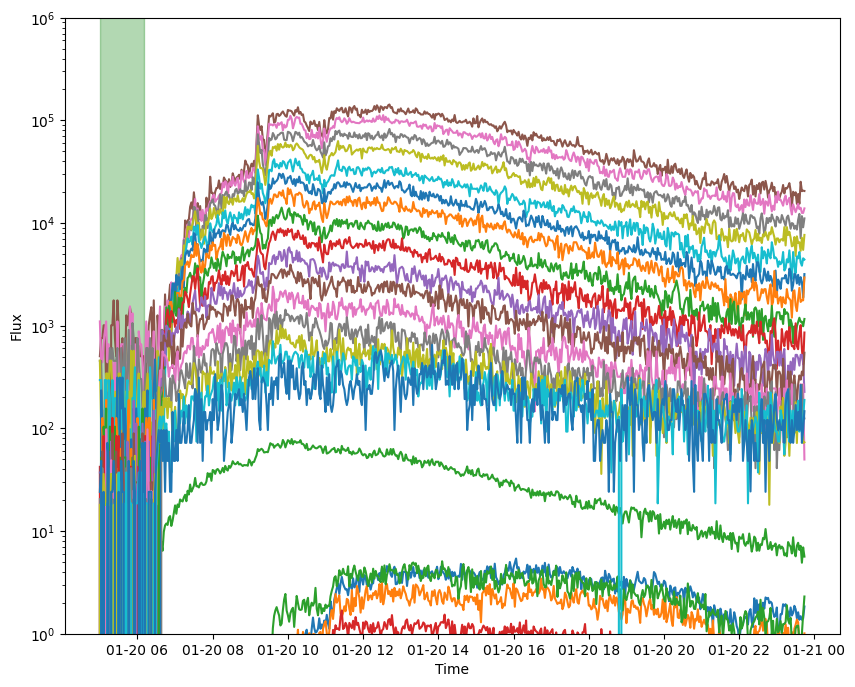

In [56]:
vda.plot_bg_selection()

In [57]:
vda.calculate_onsets()

Onset Time  \
Event No sensor particle  viewing prefix        channels                                                
1        het    protons   sun     H_Flux        H_Flux_0-H_Flux_2                 2022-01-20 09:20:00   
                                                H_Flux_3-H_Flux_5                 2022-01-20 09:16:00   
                                                H_Flux_6-H_Flux_8                 2022-01-20 08:48:00   
                                                H_Flux_9-H_Flux_11                2022-01-20 08:34:00   
                                                H_Flux_12-H_Flux_14               2022-01-20 08:20:00   
                                                H_Flux_15-H_Flux_17               2022-01-20 08:06:00   
                                                H_Flux_18-H_Flux_20               2022-01-20 07:46:00   
                                                H_Flux_21-H_Flux_23               2022-01-20 07:38:00   
                                                H_Flux_24-H_Flux_26               2022-01-20 07:30:00   
                                                H_Flux_27-H_Flux_29               2022-01-20 07:14:00   
                                                H_Flux_30-H_Flux_32               2022-01-20 07:08:00   
                                                H_Flux_33-H_Flux_35               2022-01-20 07:08:00   
                electrons sun     Electron_Flux Electron_Flux_0-Electron_Flux_1   2022-01-20 06:20:00   
                                                Electron_Flux_2-Electron_Flux_3   2022-01-20 06:42:00   
         ept    electrons sun     Electron_Flux Electron_Flux_0-Electron_Flux_1                   NaT   
                                                Electron_Flux_2-Electron_Flux_3   2022-01-20 07:08:00   
                                                Electron_Flux_4-Electron_Flux_5   2022-01-20 07:08:00   
                                                Electron_Flux_6-Electron_Flux_7   2022-01-20 06:54:00   
                                                Electron_Flux_8-Electron_Flux_9   2022-01-20 06:54:00   
                                                Electron_Flux_10-Electron_Flux_11 2022-01-20 06:46:00   
                                                Electron_Flux_12-Electron_Flux_13 2022-01-20 06:42:00   
                                                Electron_Flux_14-Electron_Flux_15 2022-01-20 06:42:00   
                                                Electron_Flux_16-Electron_Flux_17 2022-01-20 06:40:00   
                                                Electron_Flux_18-Electron_Flux_19 2022-01-20 06:32:00   
                                                Electron_Flux_20-Electron_Flux_21 2022-01-20 06:36:00   
                                                Electron_Flux_22-Electron_Flux_23 2022-01-20 06:34:00   
                                                Electron_Flux_24-Electron_Flux_25 2022-01-20 06:32:00   
                                                Electron_Flux_26-Electron_Flux_27 2022-01-20 06:30:00   
                                                Electron_Flux_28-Electron_Flux_29 2022-01-20 06:32:00   
                                                Electron_Flux_30-Electron_Flux_31 2022-01-20 06:34:00   
                                                Electron_Flux_32-Electron_Flux_33 2022-01-20 07:28:00   

                                                                                     Background Start  \
Event No sensor particle  viewing prefix        channels                                                
1        het    protons   sun     H_Flux        H_Flux_0-H_Flux_2                 2022-01-20 05:00:00   
                                                H_Flux_3-H_Flux_5                 2022-01-20 05:00:00   
                                                H_Flux_6-H_Flux_8                 2022-01-20 05:00:00   
                                                H_Flux_9-H_Flux_11                2022-01-20 05:00:0

In [58]:
vda.clean_onsets()

Onset Time  \
Event No sensor particle  viewing prefix        channels                                                
1        het    protons   sun     H_Flux        H_Flux_0-H_Flux_2                 2022-01-20 09:20:00   
                                                H_Flux_3-H_Flux_5                 2022-01-20 09:16:00   
                                                H_Flux_6-H_Flux_8                 2022-01-20 08:48:00   
                                                H_Flux_9-H_Flux_11                2022-01-20 08:34:00   
                                                H_Flux_12-H_Flux_14               2022-01-20 08:20:00   
                                                H_Flux_15-H_Flux_17               2022-01-20 08:06:00   
                                                H_Flux_18-H_Flux_20               2022-01-20 07:46:00   
                                                H_Flux_21-H_Flux_23               2022-01-20 07:38:00   
                                                H_Flux_24-H_Flux_26               2022-01-20 07:30:00   
                                                H_Flux_27-H_Flux_29               2022-01-20 07:14:00   
                                                H_Flux_30-H_Flux_32               2022-01-20 07:08:00   
                                                H_Flux_33-H_Flux_35               2022-01-20 07:08:00   
                electrons sun     Electron_Flux Electron_Flux_0-Electron_Flux_1   2022-01-20 06:20:00   
                                                Electron_Flux_2-Electron_Flux_3   2022-01-20 06:42:00   
         ept    electrons sun     Electron_Flux Electron_Flux_2-Electron_Flux_3   2022-01-20 07:08:00   
                                                Electron_Flux_4-Electron_Flux_5   2022-01-20 07:08:00   
                                                Electron_Flux_6-Electron_Flux_7   2022-01-20 06:54:00   
                                                Electron_Flux_8-Electron_Flux_9   2022-01-20 06:54:00   
                                                Electron_Flux_10-Electron_Flux_11 2022-01-20 06:46:00   
                                                Electron_Flux_12-Electron_Flux_13 2022-01-20 06:42:00   
                                                Electron_Flux_14-Electron_Flux_15 2022-01-20 06:42:00   
                                                Electron_Flux_16-Electron_Flux_17 2022-01-20 06:40:00   
                                                Electron_Flux_18-Electron_Flux_19 2022-01-20 06:32:00   
                                                Electron_Flux_20-Electron_Flux_21 2022-01-20 06:36:00   
                                                Electron_Flux_22-Electron_Flux_23 2022-01-20 06:34:00   
                                                Electron_Flux_24-Electron_Flux_25 2022-01-20 06:32:00   
                                                Electron_Flux_26-Electron_Flux_27 2022-01-20 06:30:00   
                                                Electron_Flux_28-Electron_Flux_29 2022-01-20 06:32:00   
                                                Electron_Flux_30-Electron_Flux_31 2022-01-20 06:34:00   
                                                Electron_Flux_32-Electron_Flux_33 2022-01-20 07:28:00   

                                                                                     Background Start  \
Event No sensor particle  viewing prefix        channels                                                
1        het    protons   sun     H_Flux        H_Flux_0-H_Flux_2                 2022-01-20 05:00:00   
                                                H_Flux_3-H_Flux_5                 2022-01-20 05:00:00   
                                                H_Flux_6-H_Flux_8                 2022-01-20 05:00:00   
                                                H_Flux_9-H_Flux_11                2022-01-20 05:00:00   
                                                H_Flux_12-H_Flux_14               2022-01-20 05:00:0

### <a id='toc1_2_5_'></a>[Onset Selection](#toc0_)

In [59]:
vda.construct_options_df()
# internal dataframe used for the onset selection

Onset Time  \
Event No sensor particle  prefix        channels                          viewing                       
1        het    protons   H_Flux        H_Flux_0-H_Flux_2                 sun     2022-01-20 09:20:00   
                                        H_Flux_3-H_Flux_5                 sun     2022-01-20 09:16:00   
                                        H_Flux_6-H_Flux_8                 sun     2022-01-20 08:48:00   
                                        H_Flux_9-H_Flux_11                sun     2022-01-20 08:34:00   
                                        H_Flux_12-H_Flux_14               sun     2022-01-20 08:20:00   
                                        H_Flux_15-H_Flux_17               sun     2022-01-20 08:06:00   
                                        H_Flux_18-H_Flux_20               sun     2022-01-20 07:46:00   
                                        H_Flux_21-H_Flux_23               sun     2022-01-20 07:38:00   
                                        H_Flux_24-H_Flux_26               sun     2022-01-20 07:30:00   
                                        H_Flux_27-H_Flux_29               sun     2022-01-20 07:14:00   
                                        H_Flux_30-H_Flux_32               sun     2022-01-20 07:08:00   
                                        H_Flux_33-H_Flux_35               sun     2022-01-20 07:08:00   
                electrons Electron_Flux Electron_Flux_0-Electron_Flux_1   sun     2022-01-20 06:20:00   
                                        Electron_Flux_2-Electron_Flux_3   sun     2022-01-20 06:42:00   
         ept    electrons Electron_Flux Electron_Flux_2-Electron_Flux_3   sun     2022-01-20 07:08:00   
                                        Electron_Flux_4-Electron_Flux_5   sun     2022-01-20 07:08:00   
                                        Electron_Flux_6-Electron_Flux_7   sun     2022-01-20 06:54:00   
                                        Electron_Flux_8-Electron_Flux_9   sun     2022-01-20 06:54:00   
                                        Electron_Flux_10-Electron_Flux_11 sun     2022-01-20 06:46:00   
                                        Electron_Flux_12-Electron_Flux_13 sun     2022-01-20 06:42:00   
                                        Electron_Flux_14-Electron_Flux_15 sun     2022-01-20 06:42:00   
                                        Electron_Flux_16-Electron_Flux_17 sun     2022-01-20 06:40:00   
                                        Electron_Flux_18-Electron_Flux_19 sun     2022-01-20 06:32:00   
                                        Electron_Flux_20-Electron_Flux_21 sun     2022-01-20 06:36:00   
                                        Electron_Flux_22-Electron_Flux_23 sun     2022-01-20 06:34:00   
                                        Electron_Flux_24-Electron_Flux_25 sun     2022-01-20 06:32:00   
                                        Electron_Flux_26-Electron_Flux_27 sun     2022-01-20 06:30:00   
                                        Electron_Flux_28-Electron_Flux_29 sun     2022-01-20 06:32:00   
                                        Electron_Flux_30-Electron_Flux_31 sun     2022-01-20 06:34:00   
                                        Electron_Flux_32-Electron_Flux_33 sun     2022-01-20 07:28:00   

                                                                                     Background Start  \
Event No sensor particle  prefix        channels                          viewing                       
1        het    protons   H_Flux        H_Flux_0-H_Flux_2                 sun     2022-01-20 05:00:00   
                                        H_Flux_3-H_Flux_5                 sun     2022-01-20 05:00:00   
                                        H_Flux_6-H_Flux_8                 sun     2022-01-20 05:00:00   
                                        H_Flux_9-H_Flux_11                sun     2022-01-20 05:00:00   
                                        H_Flux_12-H_Flux_14               sun     2022-01-20 05:00:0

- Onset determination method: choose how the onset times that will be used for the VDA plots should be chosen. Options:
  - Use all: every determined onset time will be used
  - Interactive: the execution of the notebook will be halted and the user will be prompted to decide whether to use the determined onset or not individually *(under development)*
  - Custom list: all the determined onsets will be plotted and the execution of the notebook will be halted. The user should construct a list defining which viewing should be used per individual channel. The list items should follow the same order as the one of the displayed plots. *(under development)*

In [60]:
vda_displayer.display_onset_selection_selection()

Dropdown(description='Onset selection method:', options=(('Use all', 0), ('Interactive', 1), ('Custom List', 2…

In [61]:
vda.select_onsets()

In [ ]:
vda.df_options

In [ ]:
["None" for ]

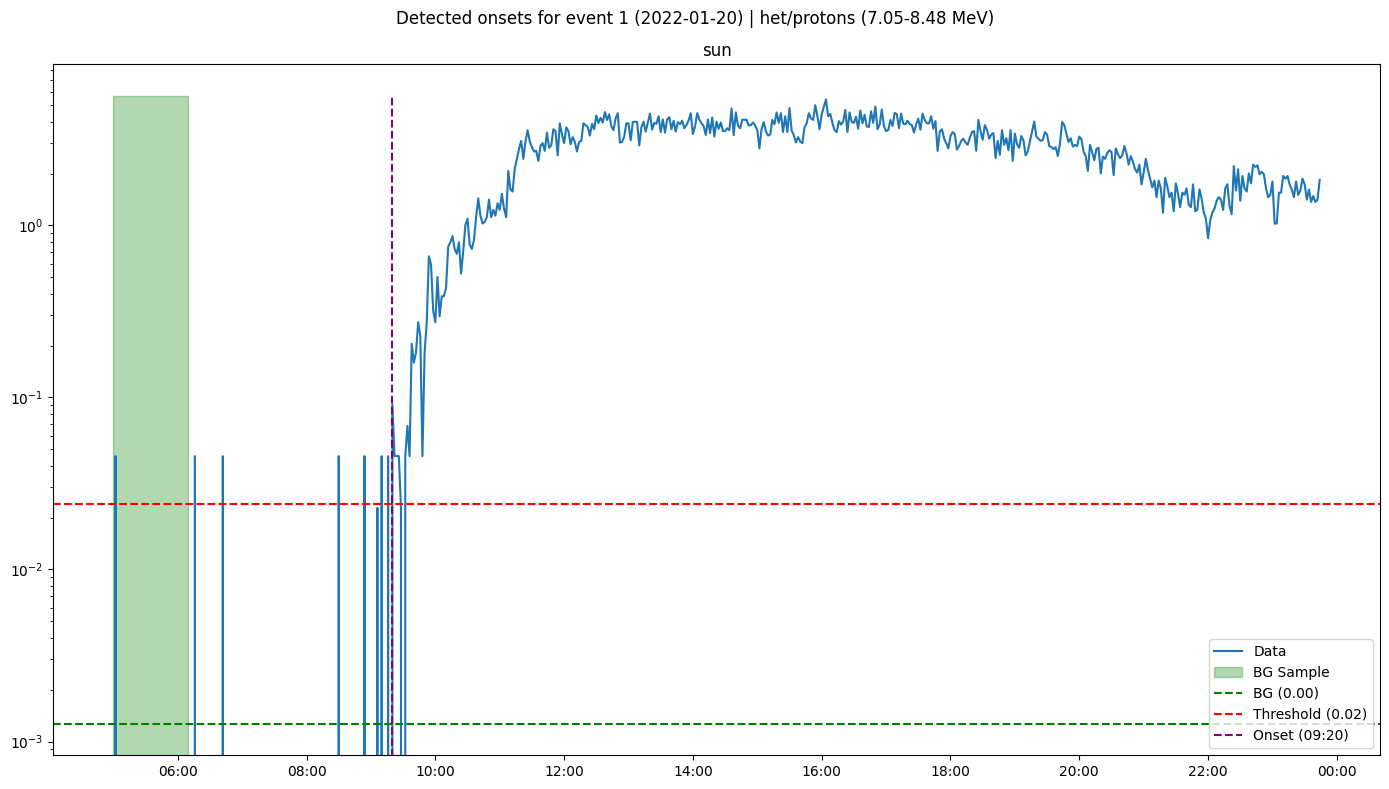

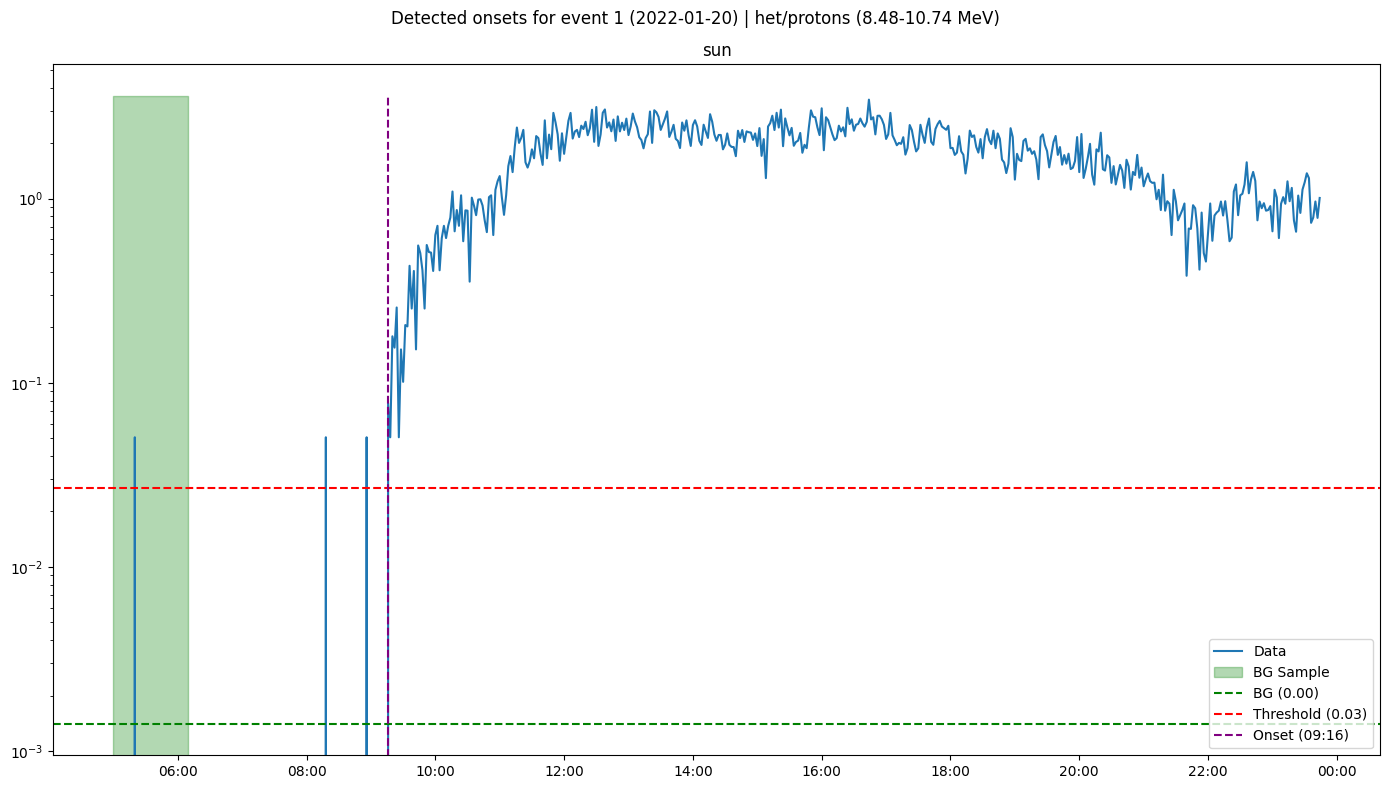

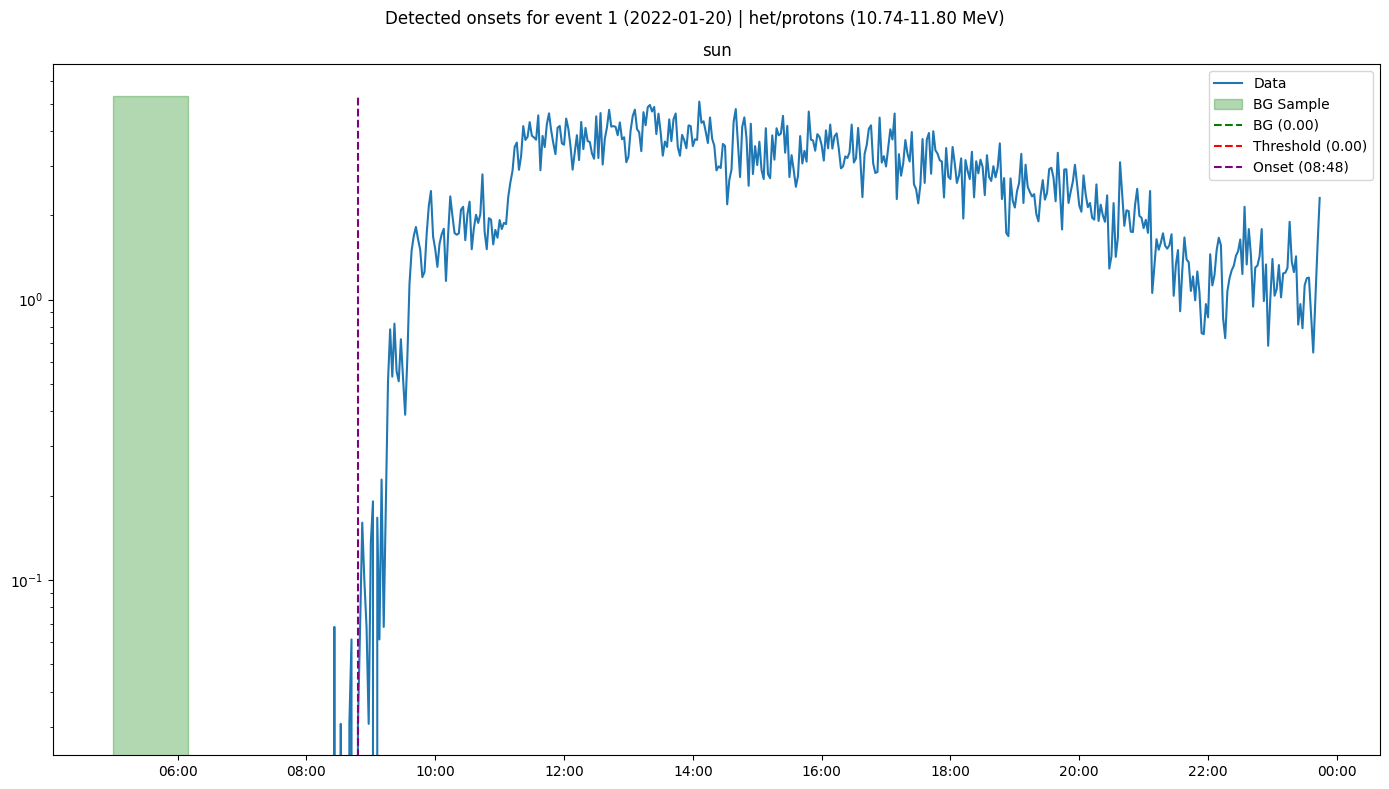

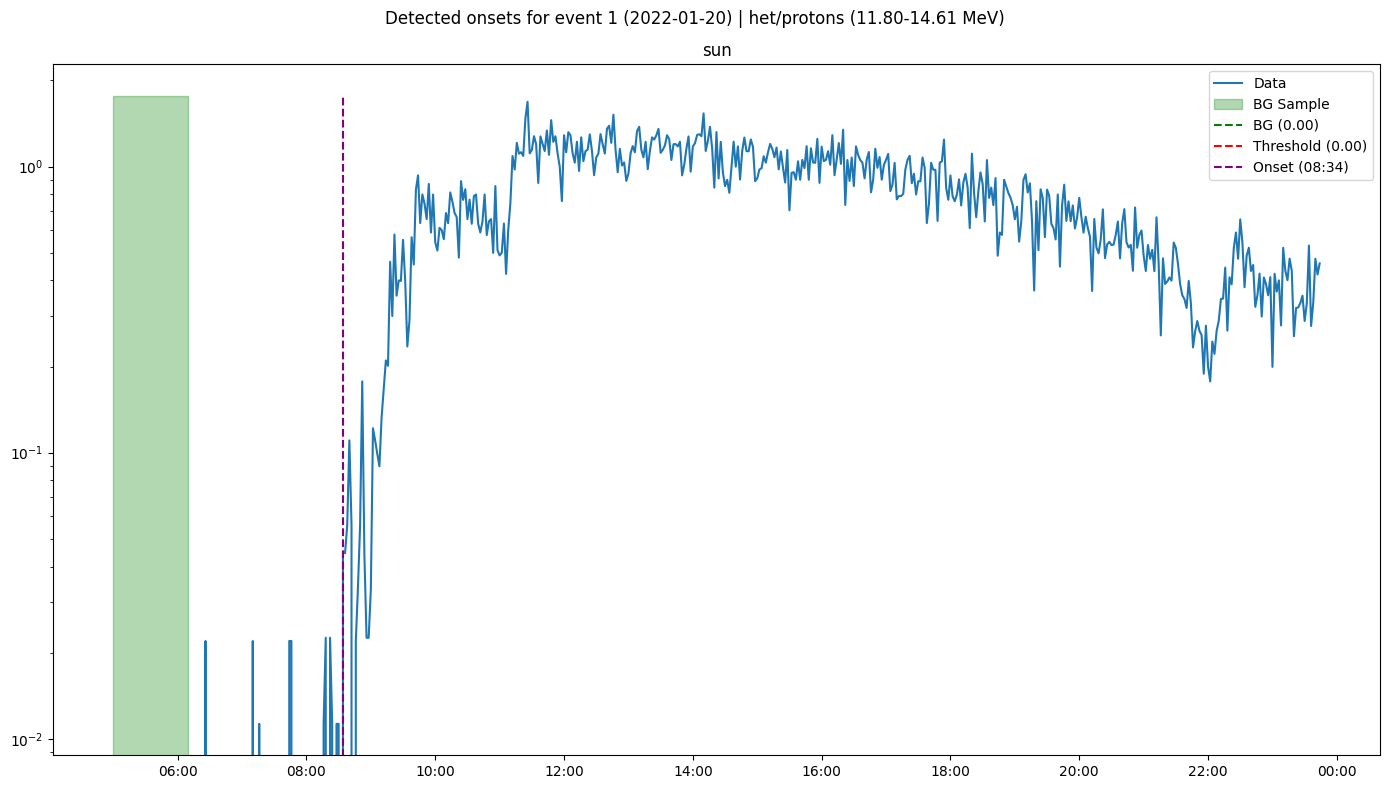

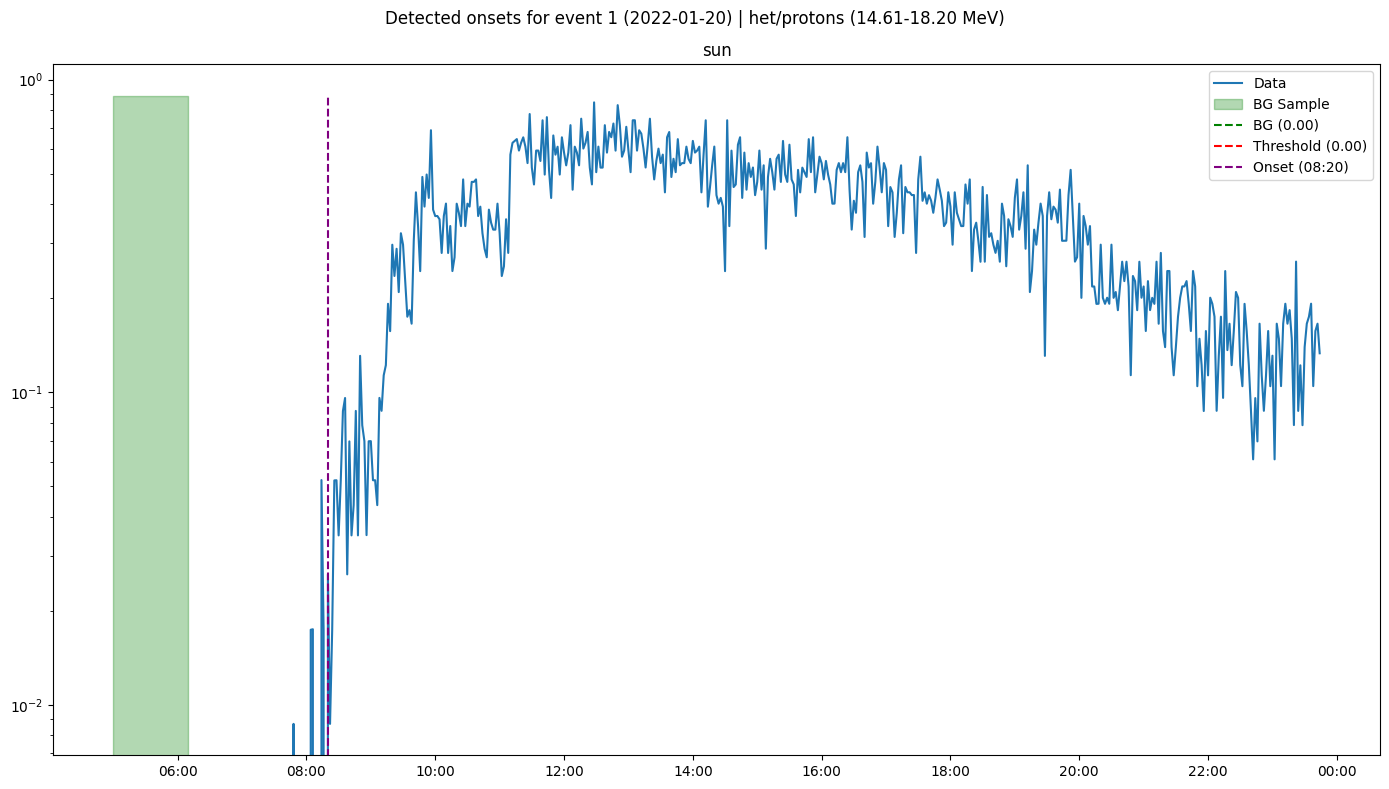

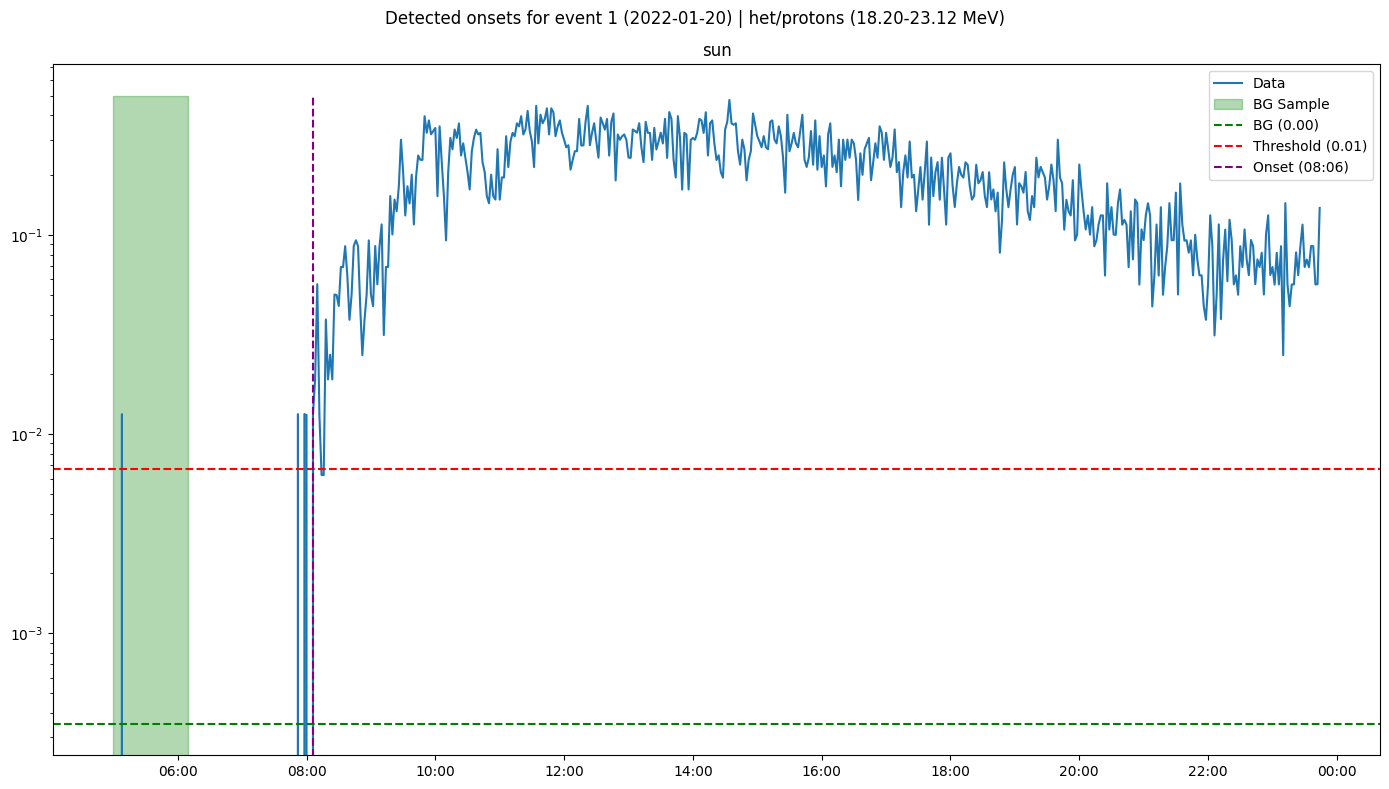

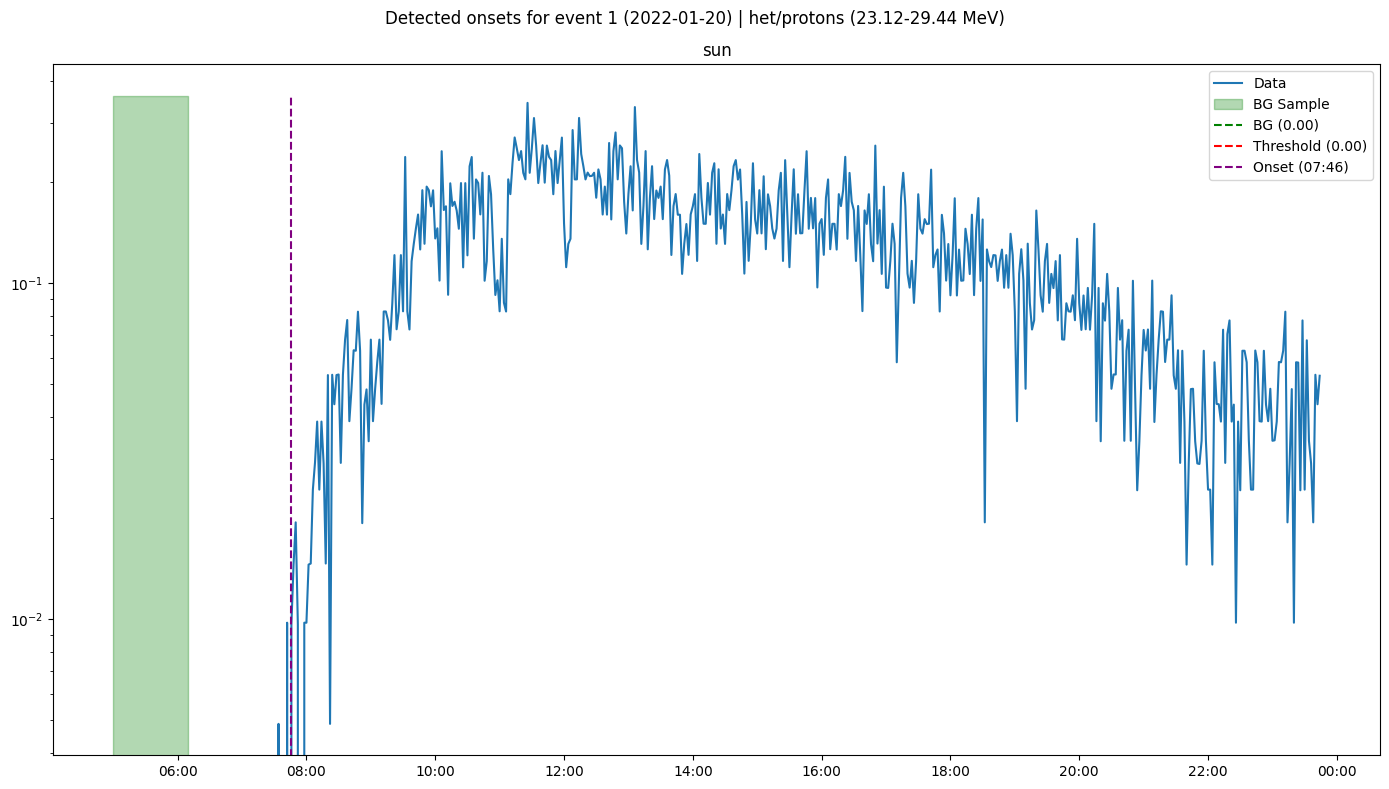

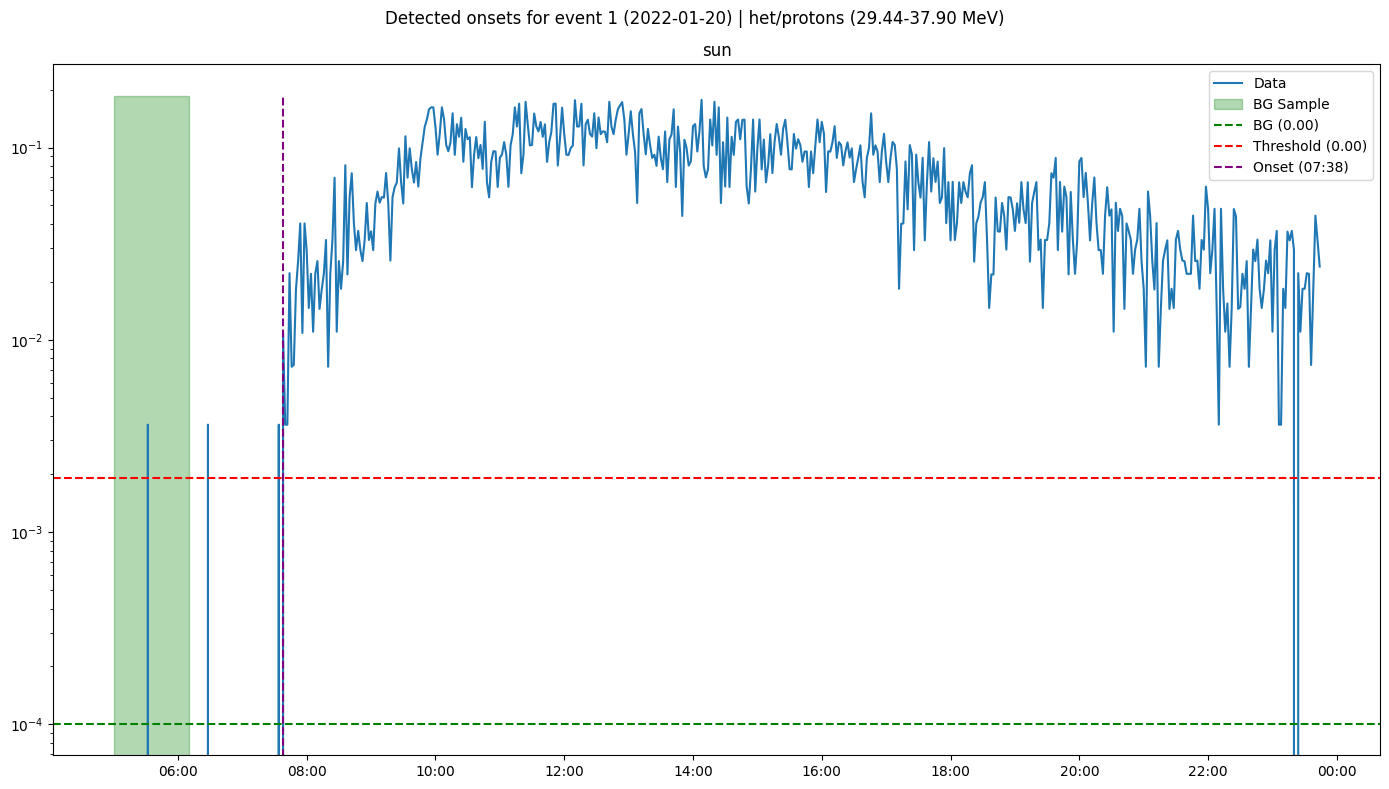

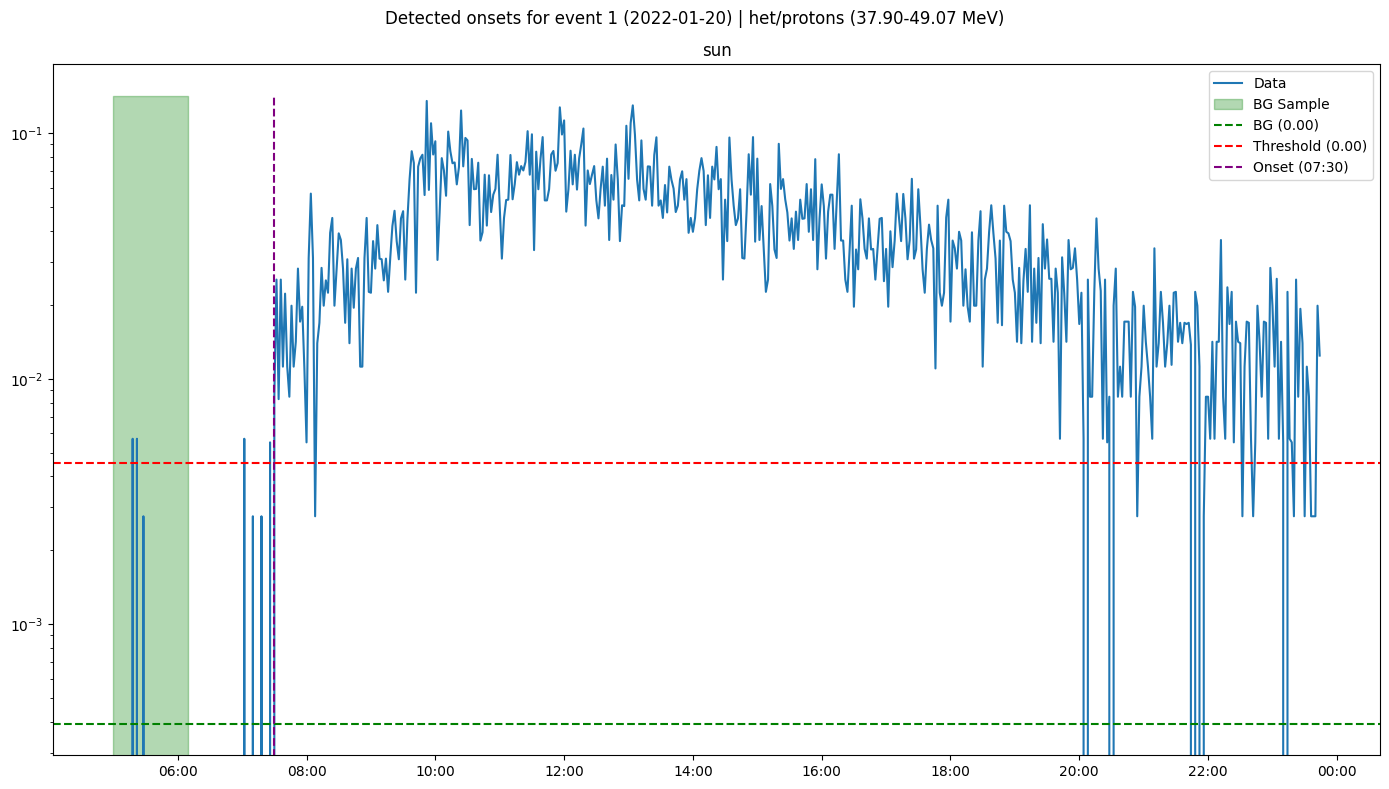

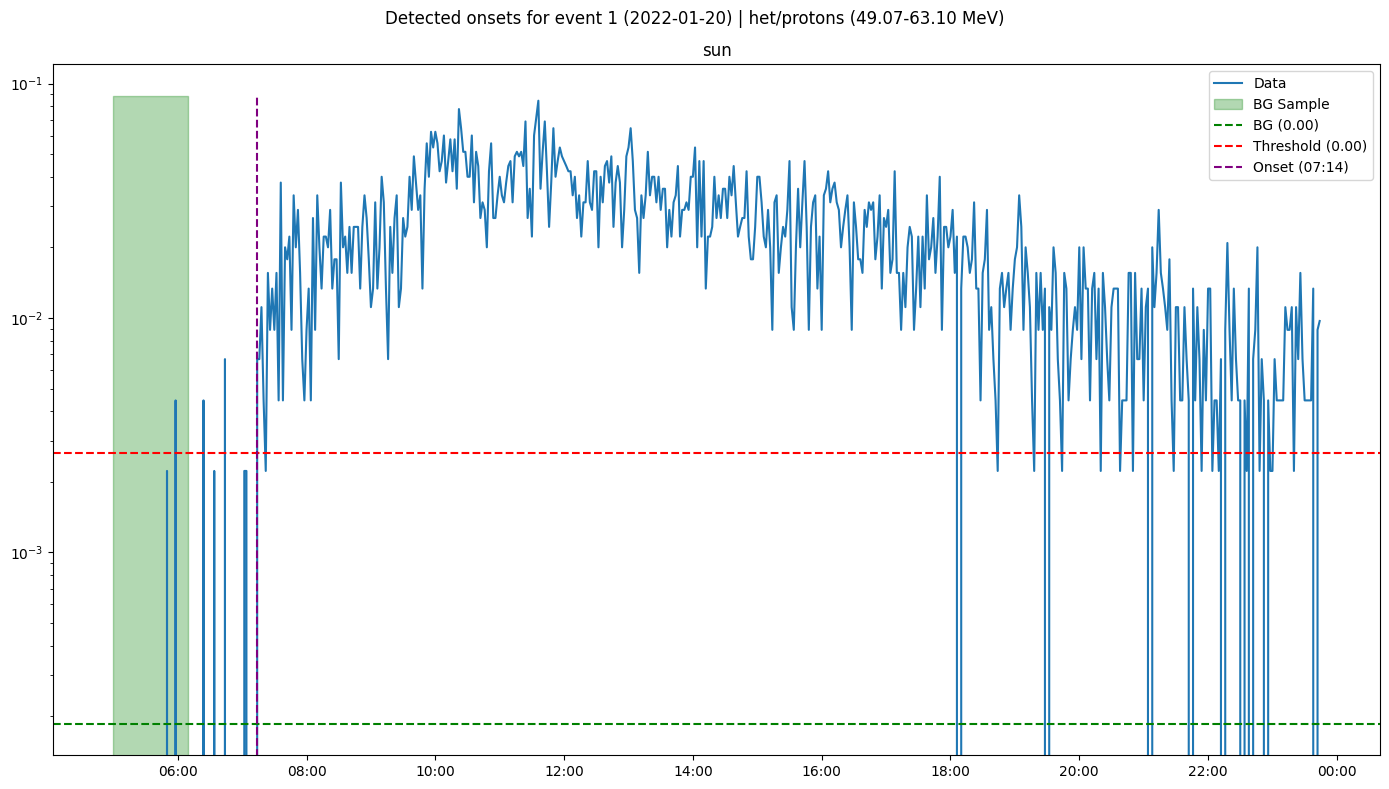

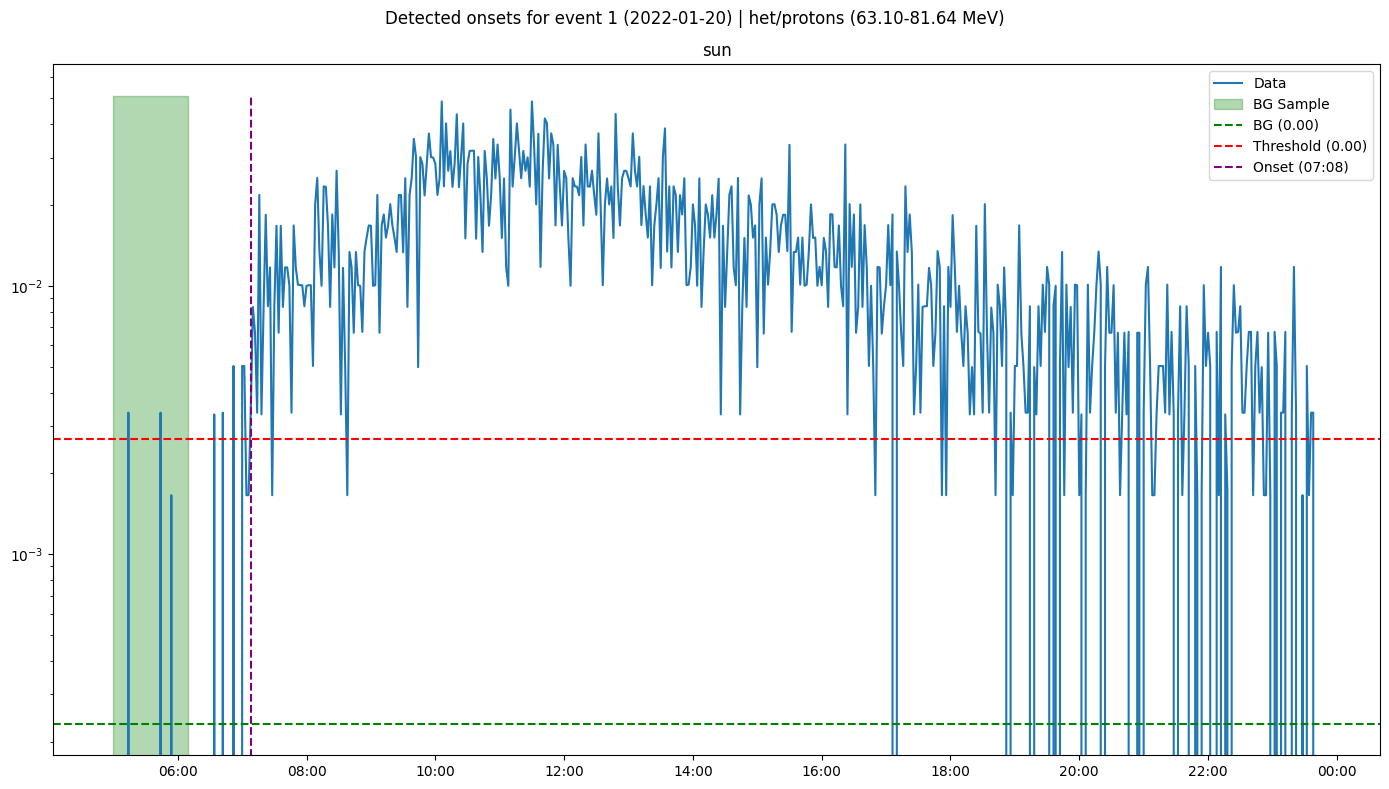

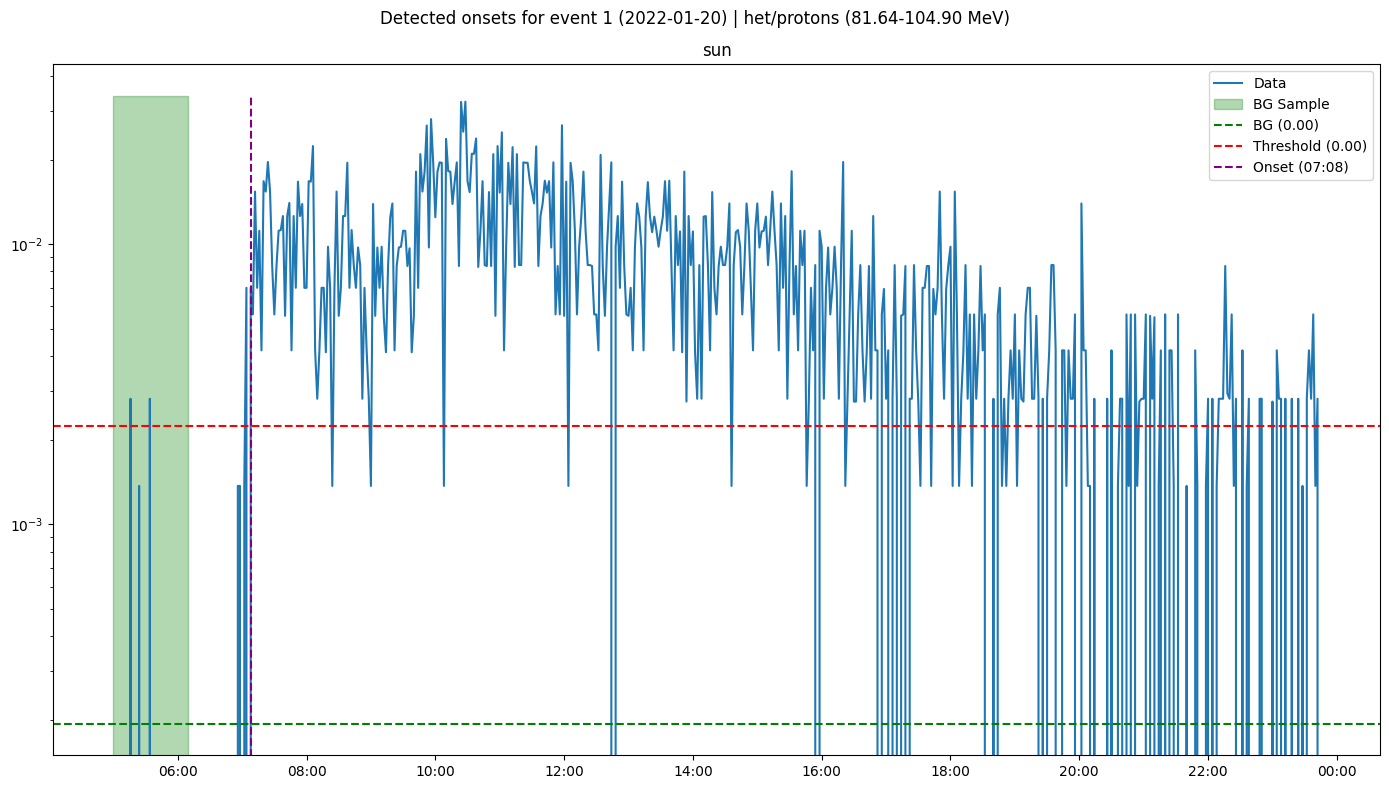

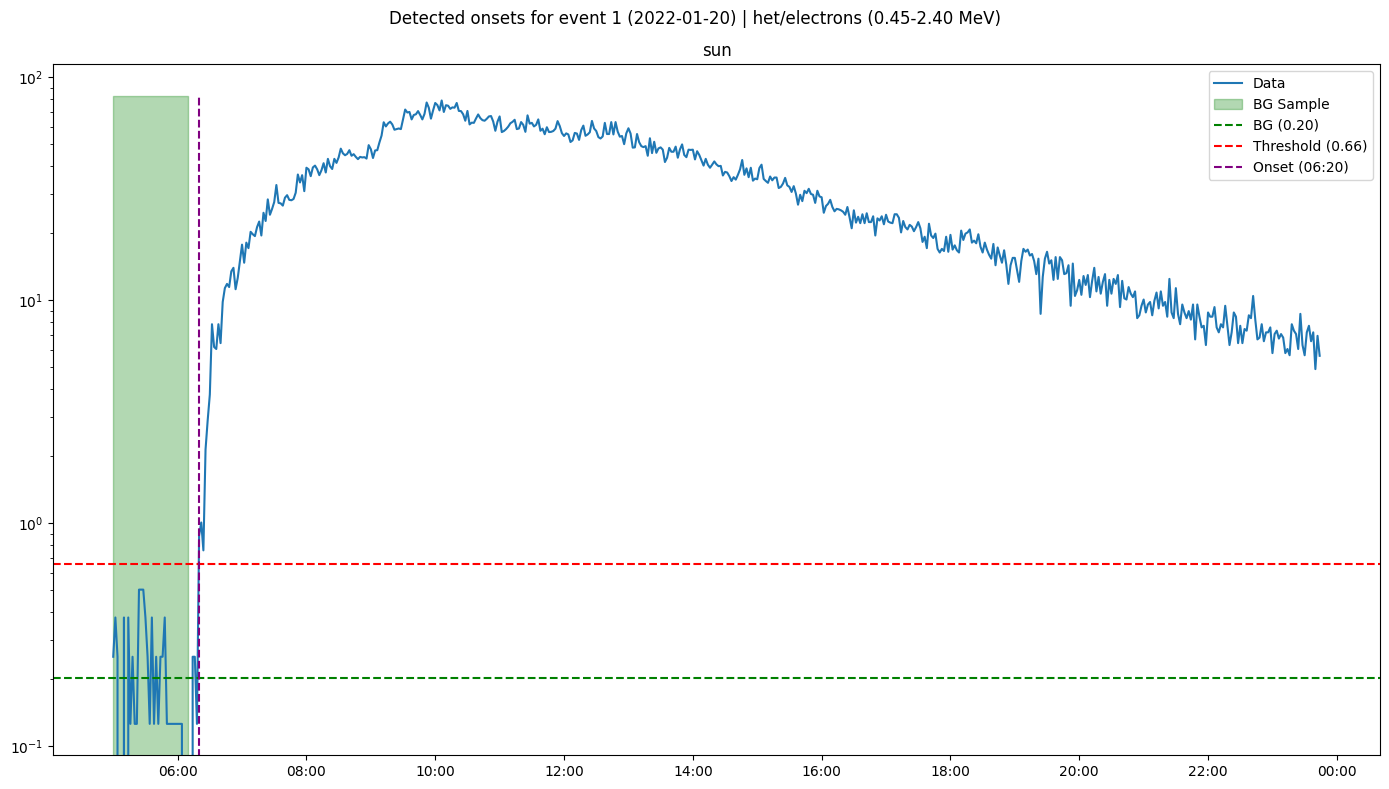

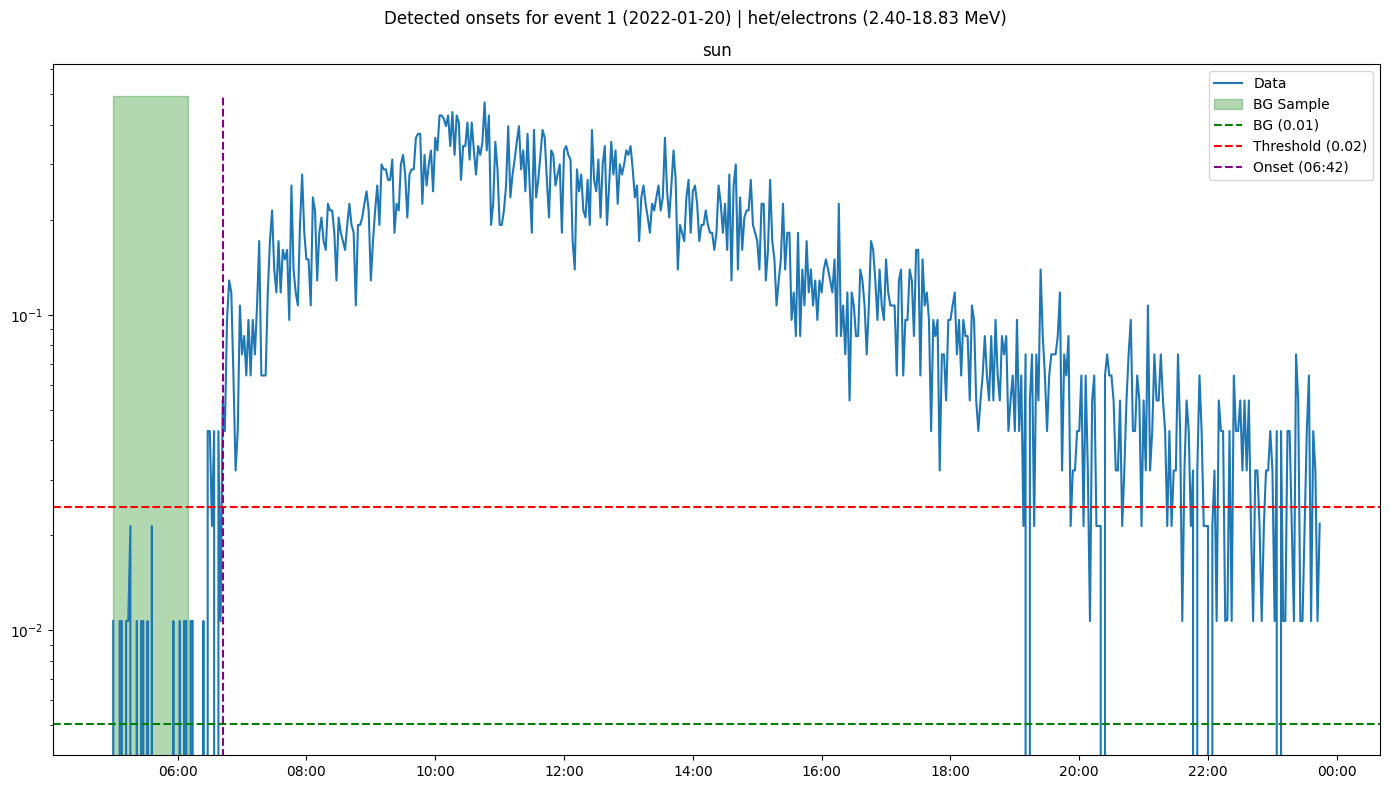

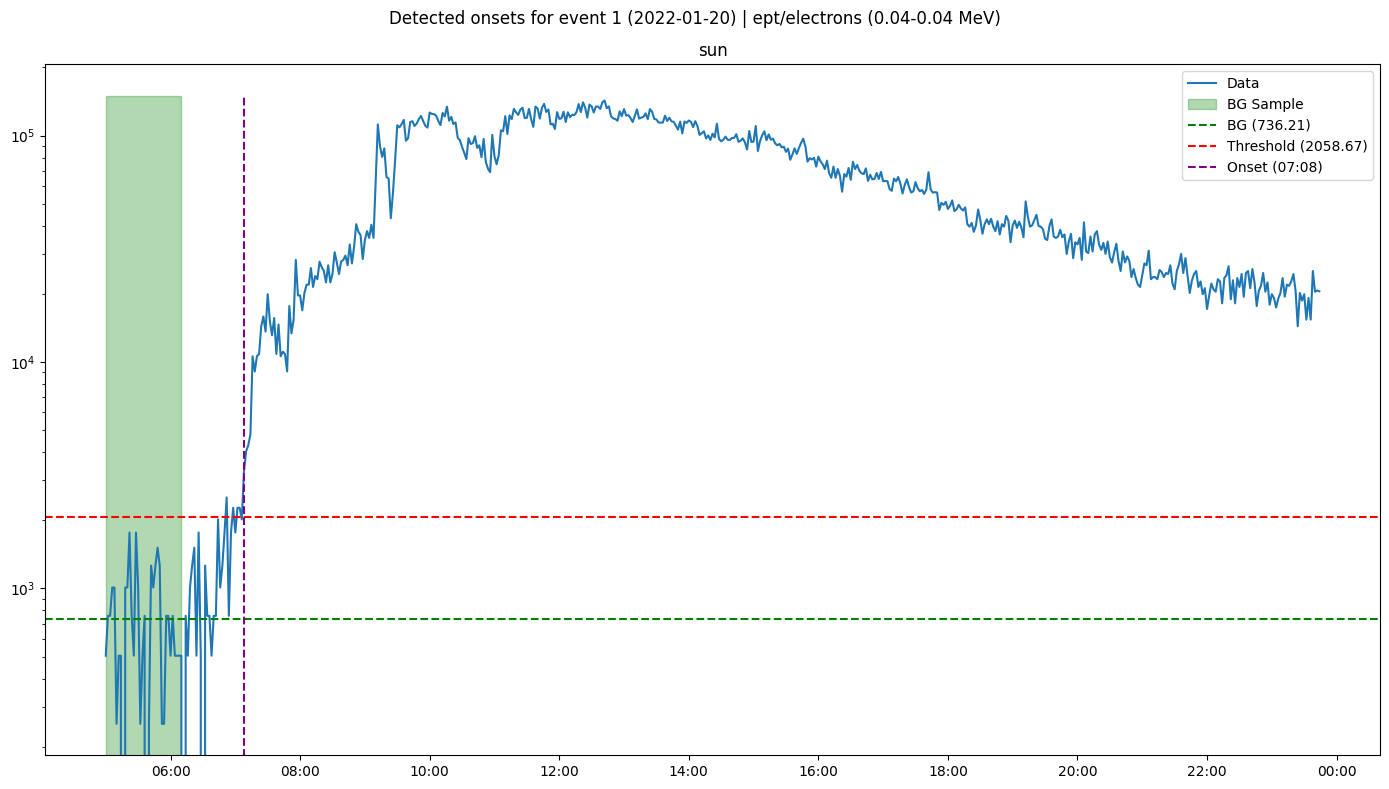

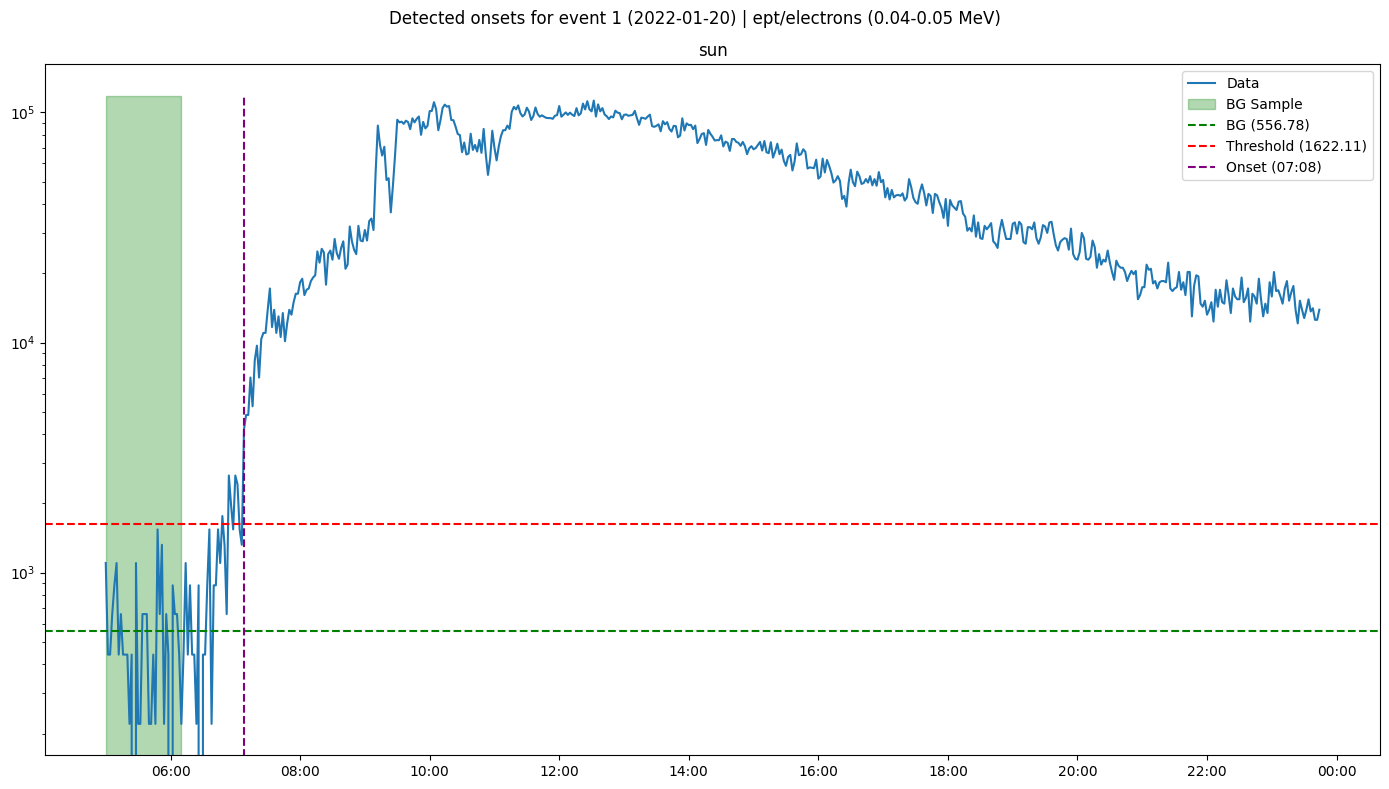

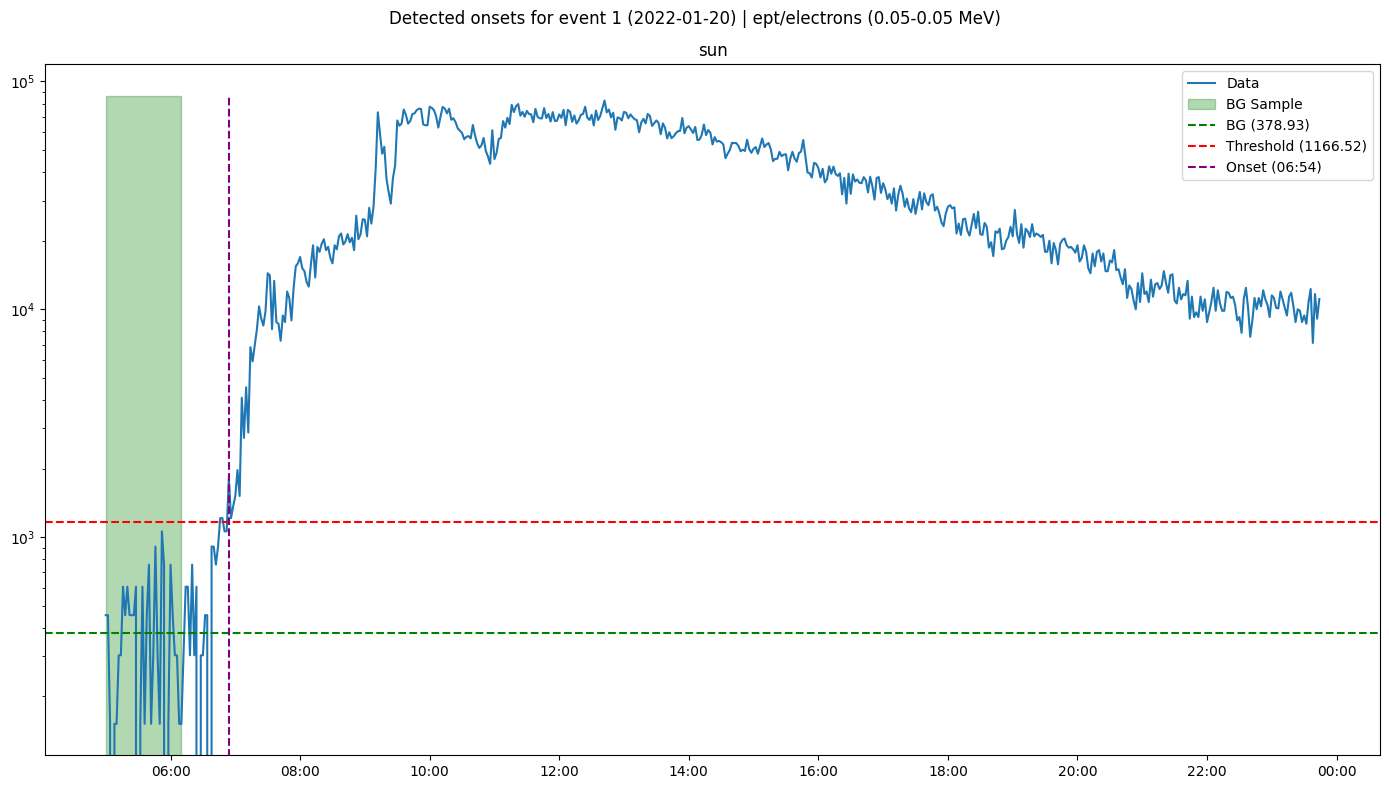

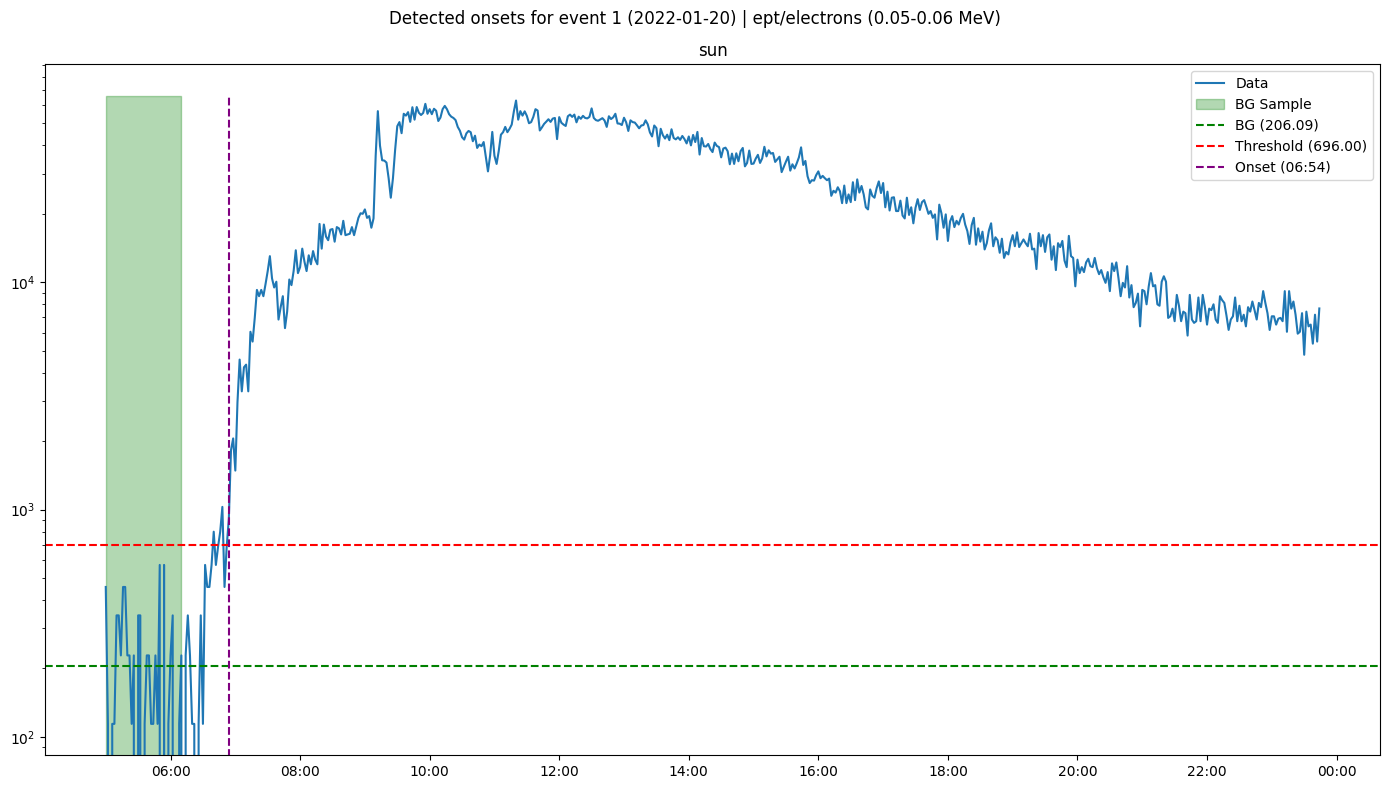

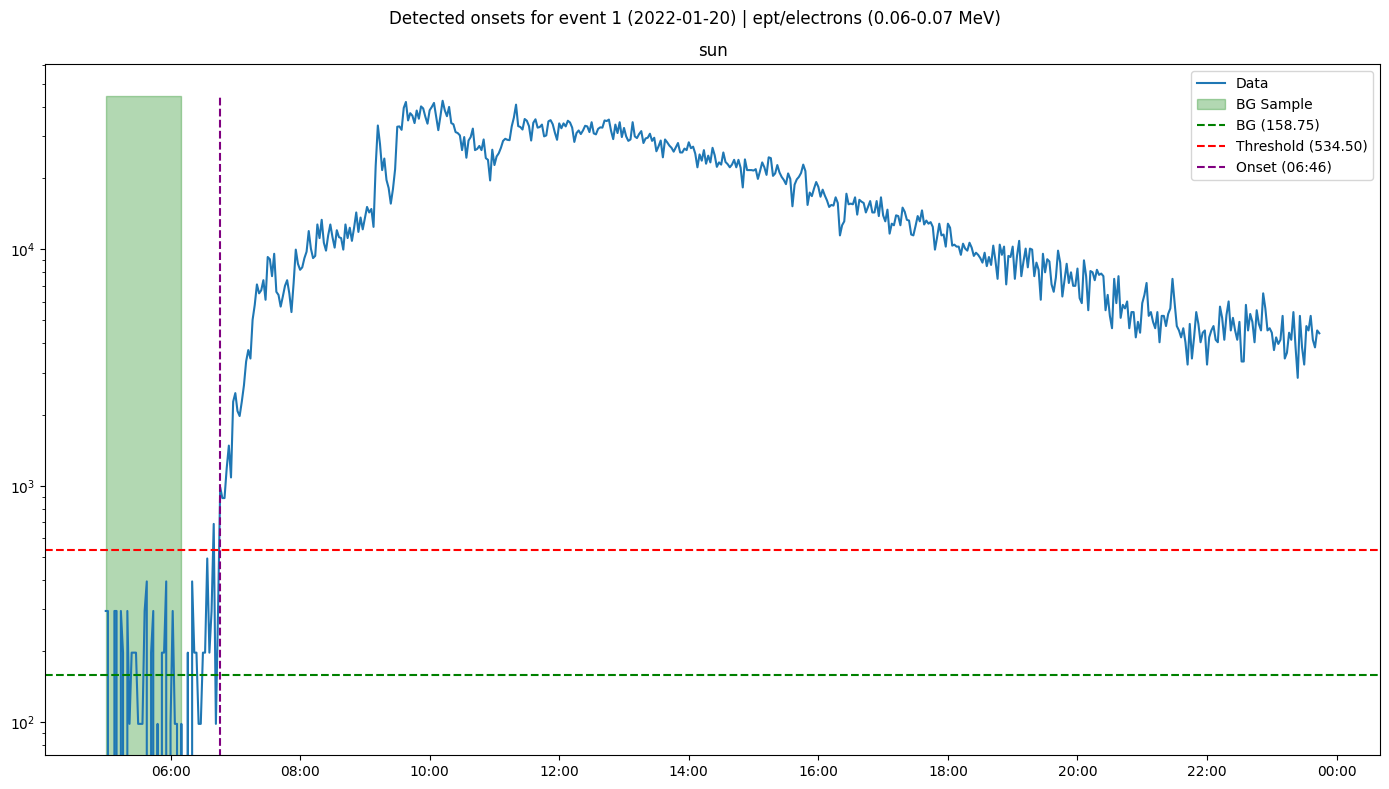

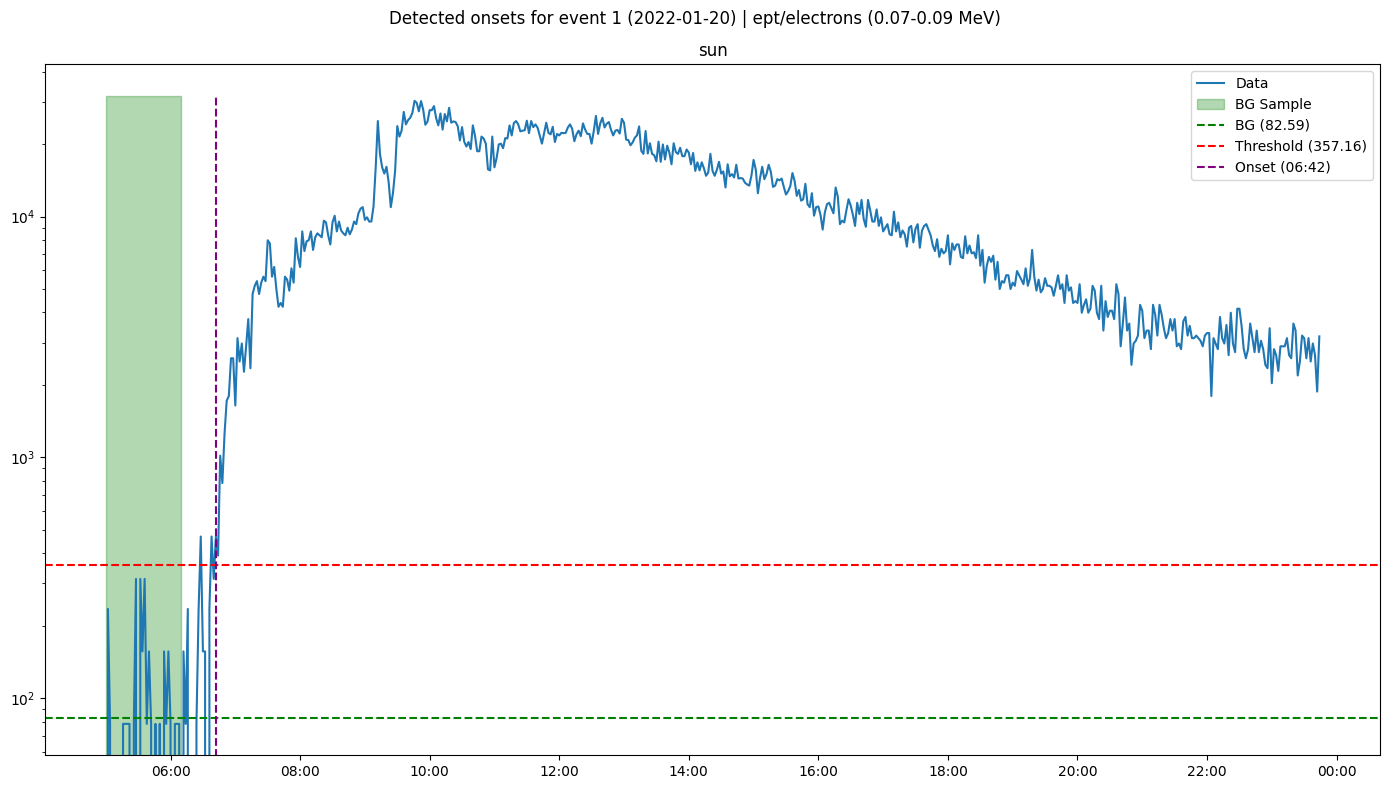

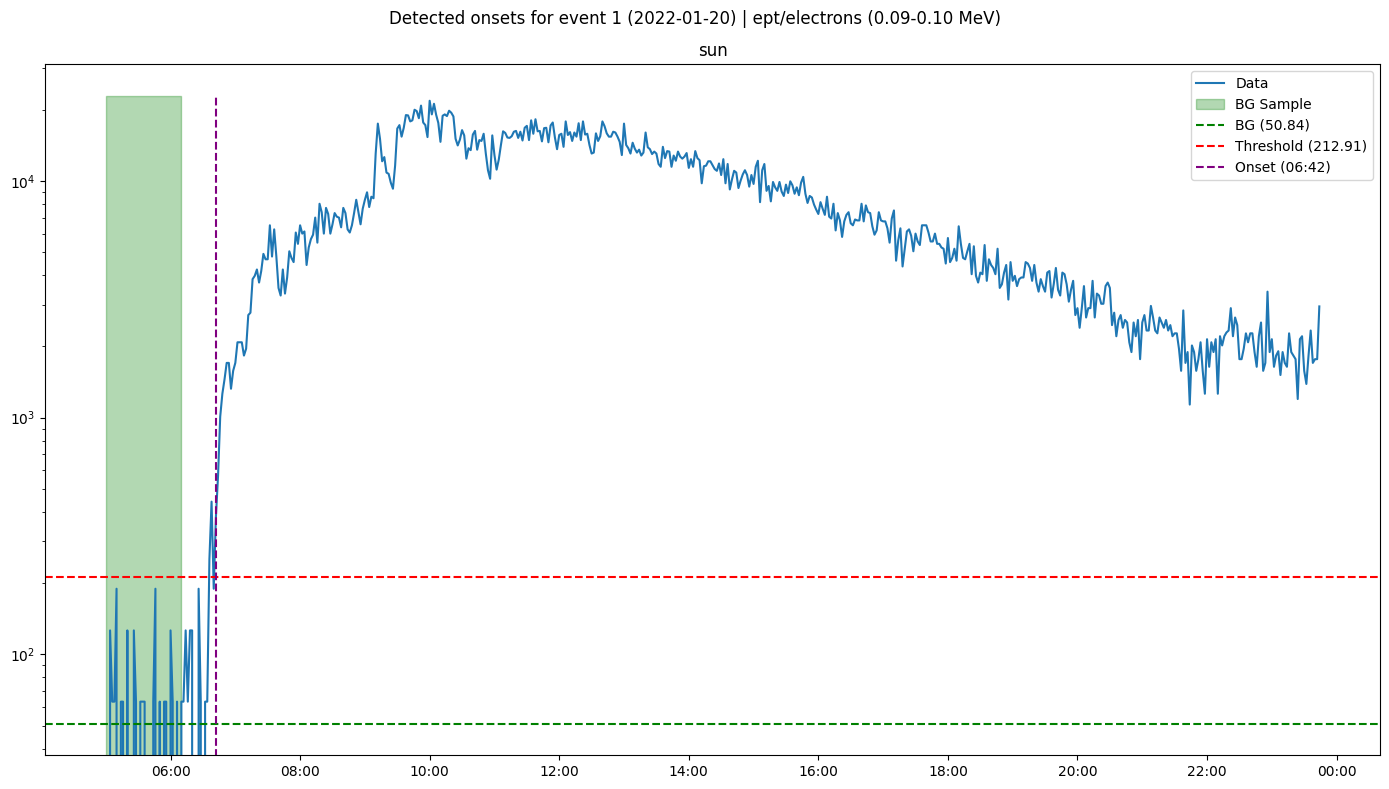

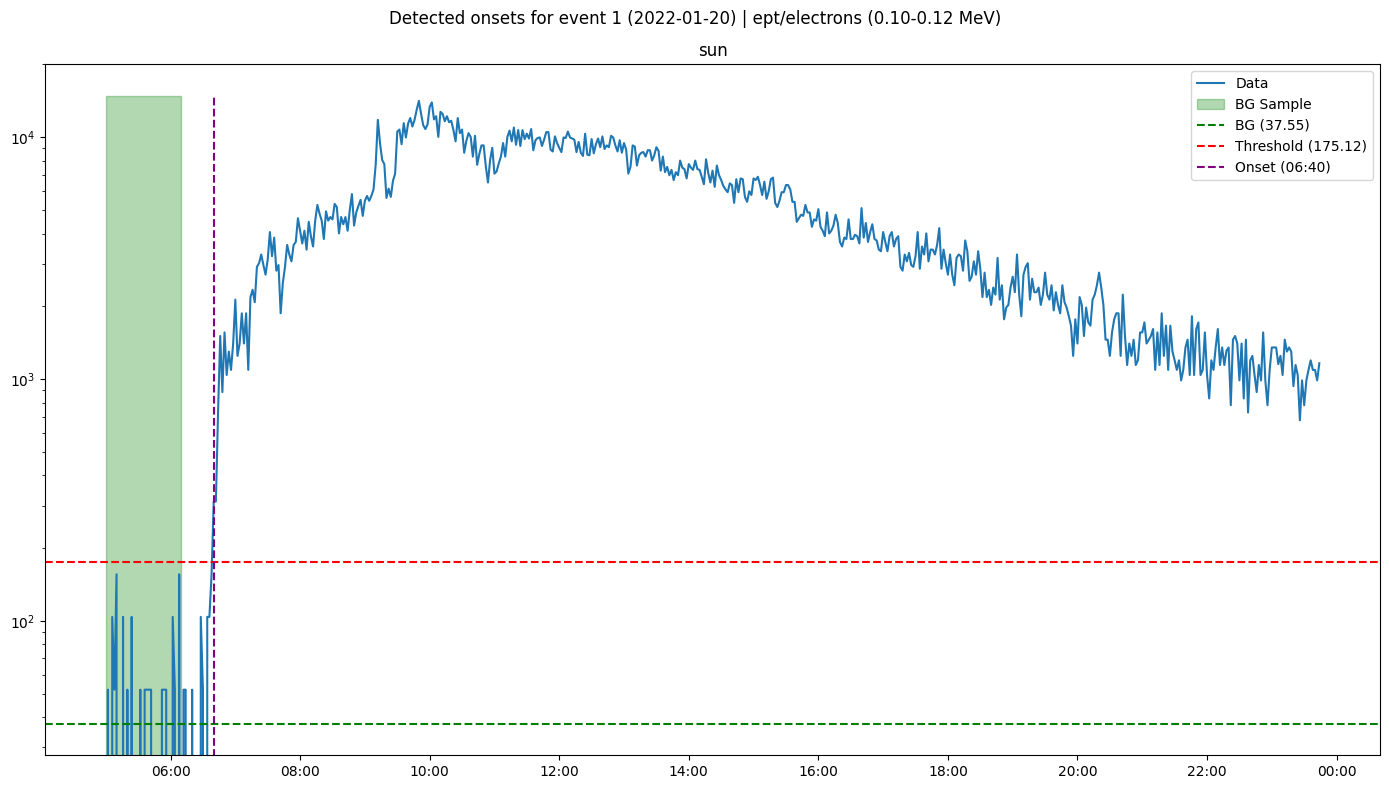

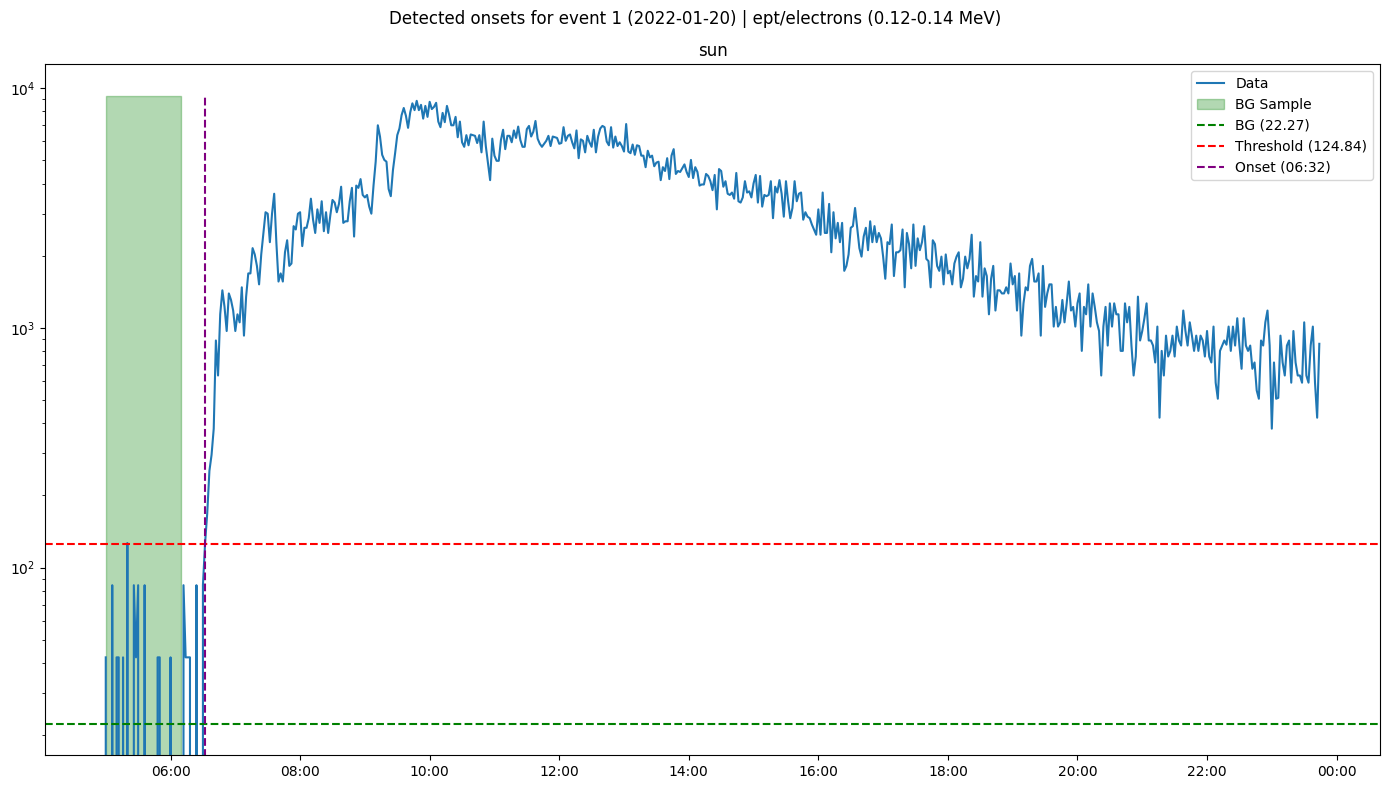

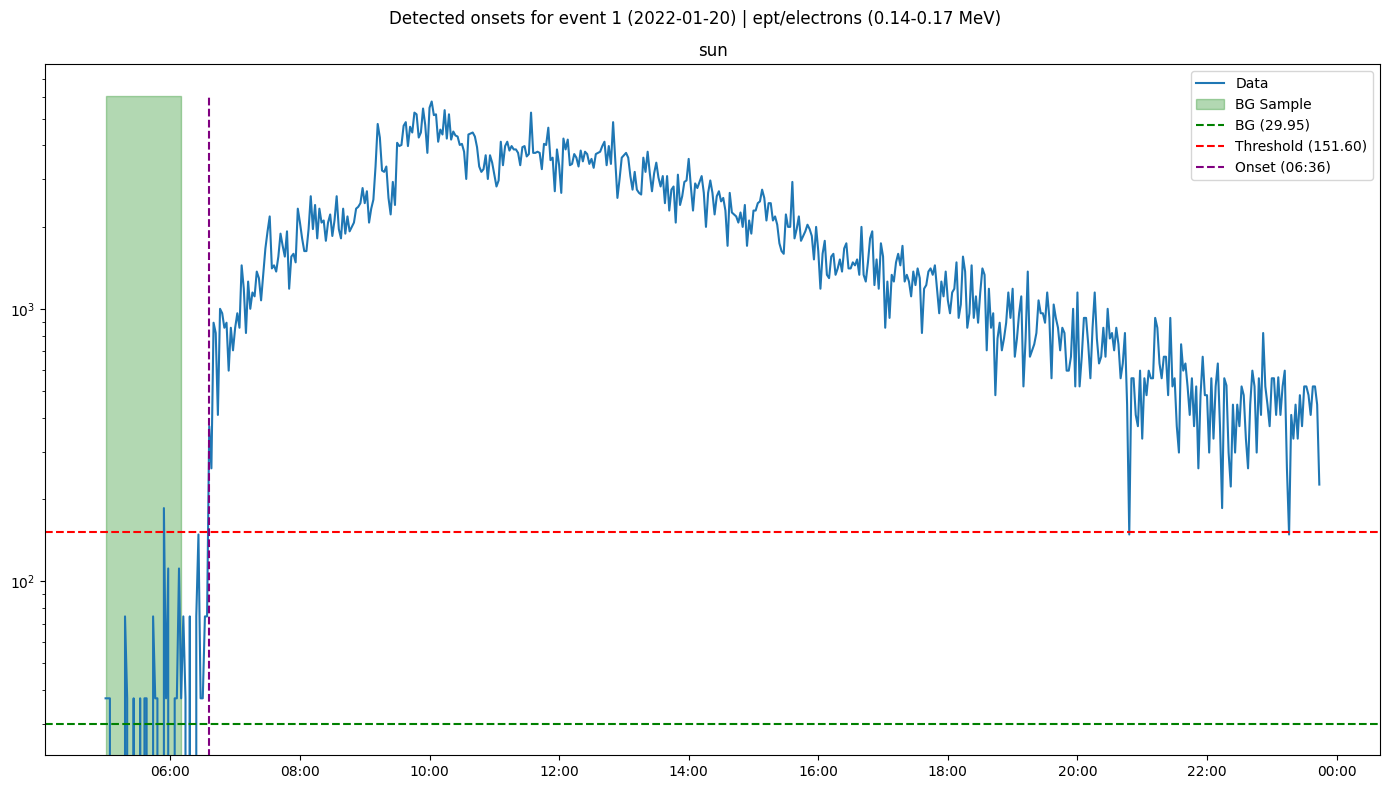

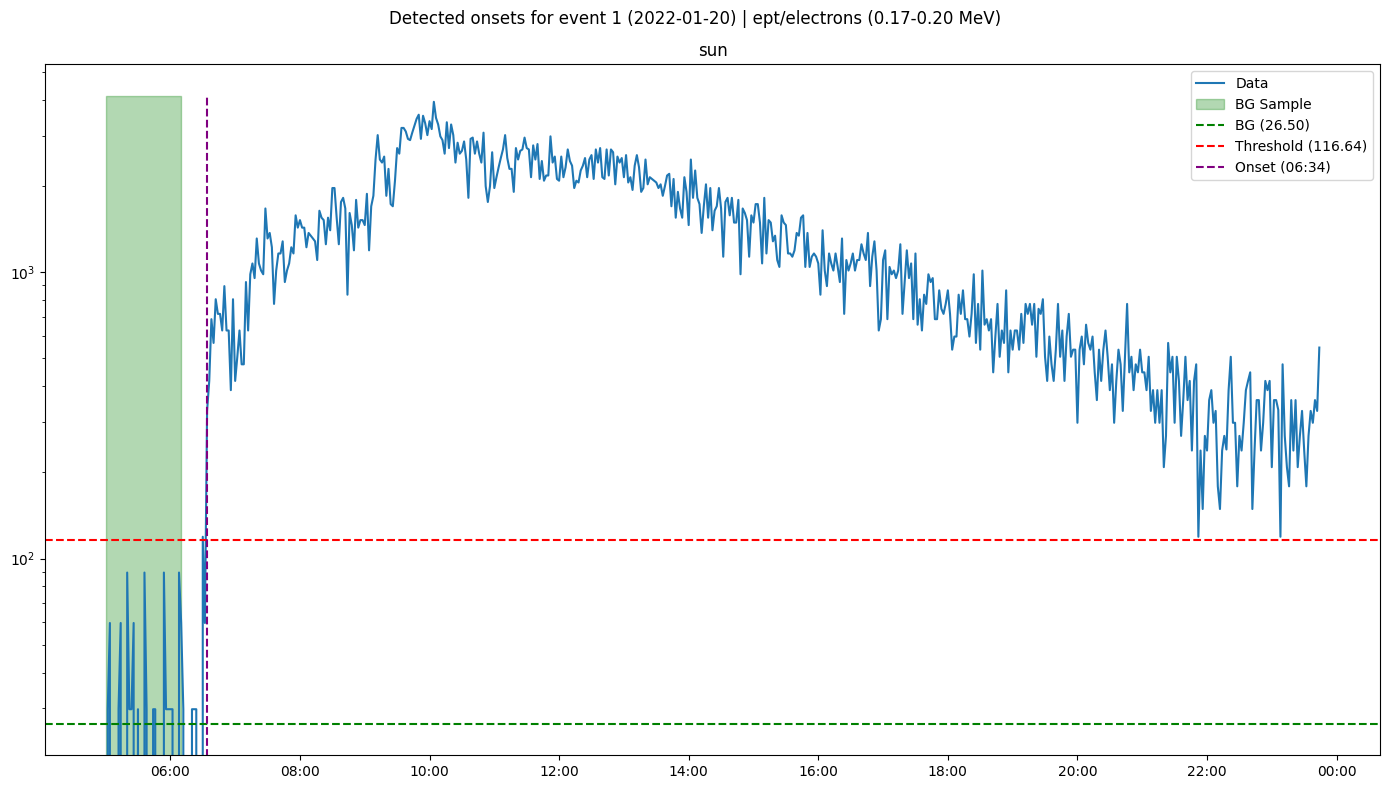

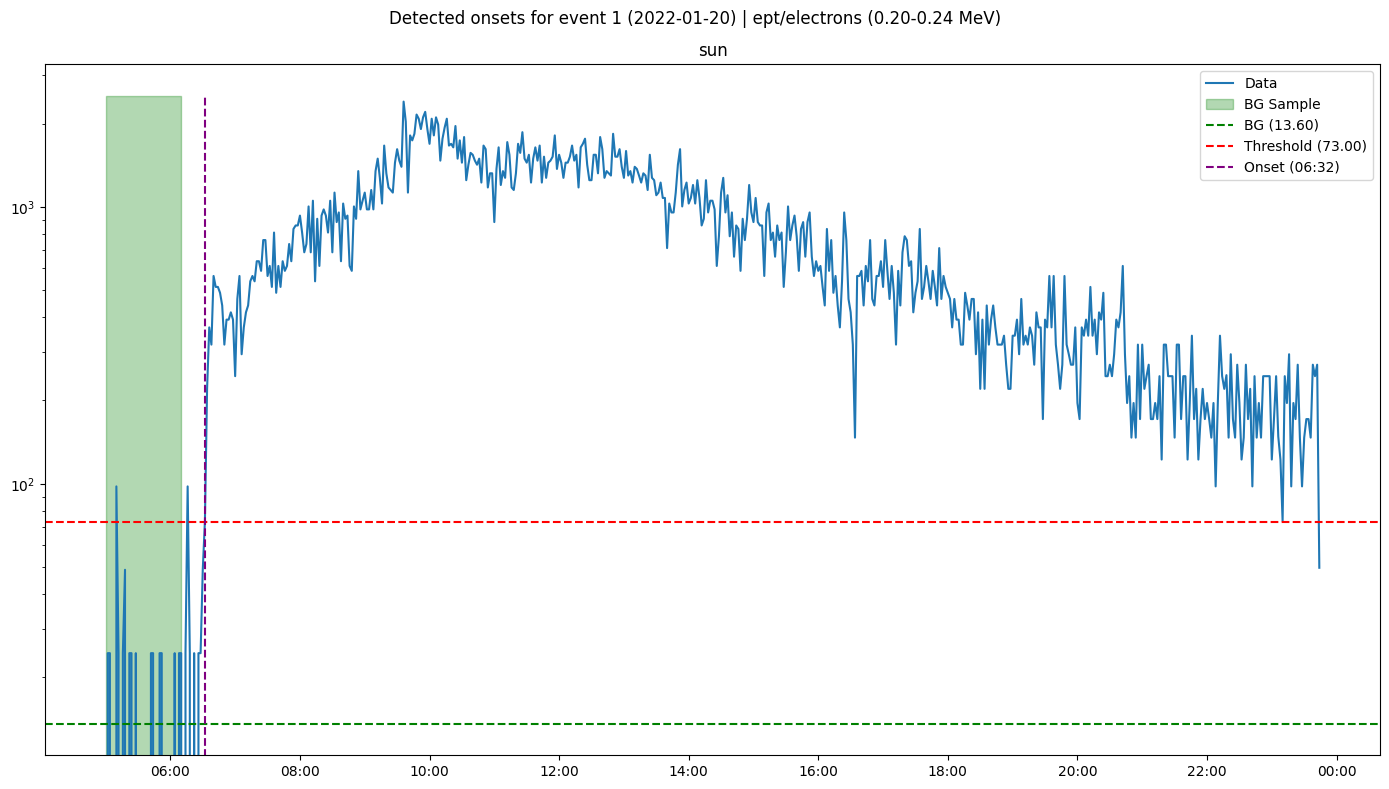

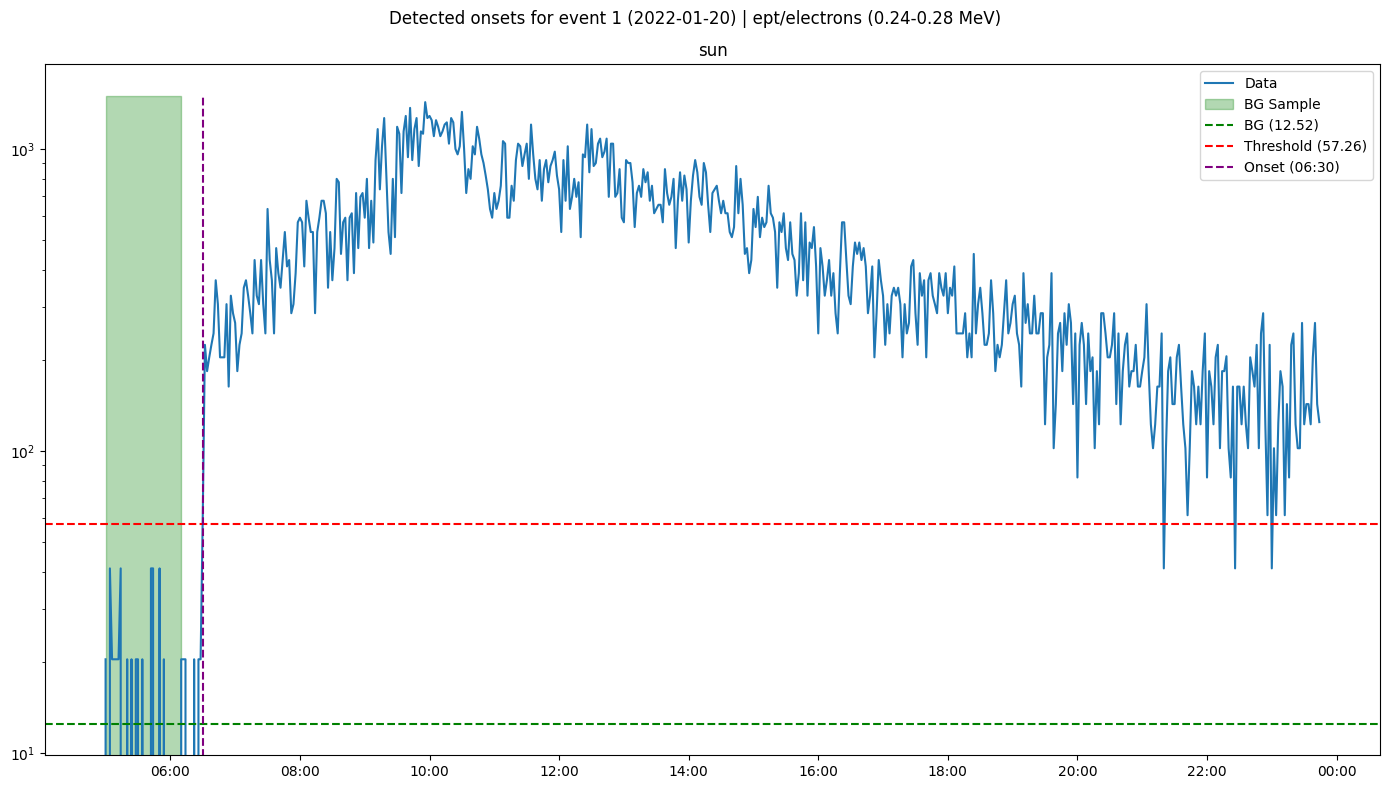

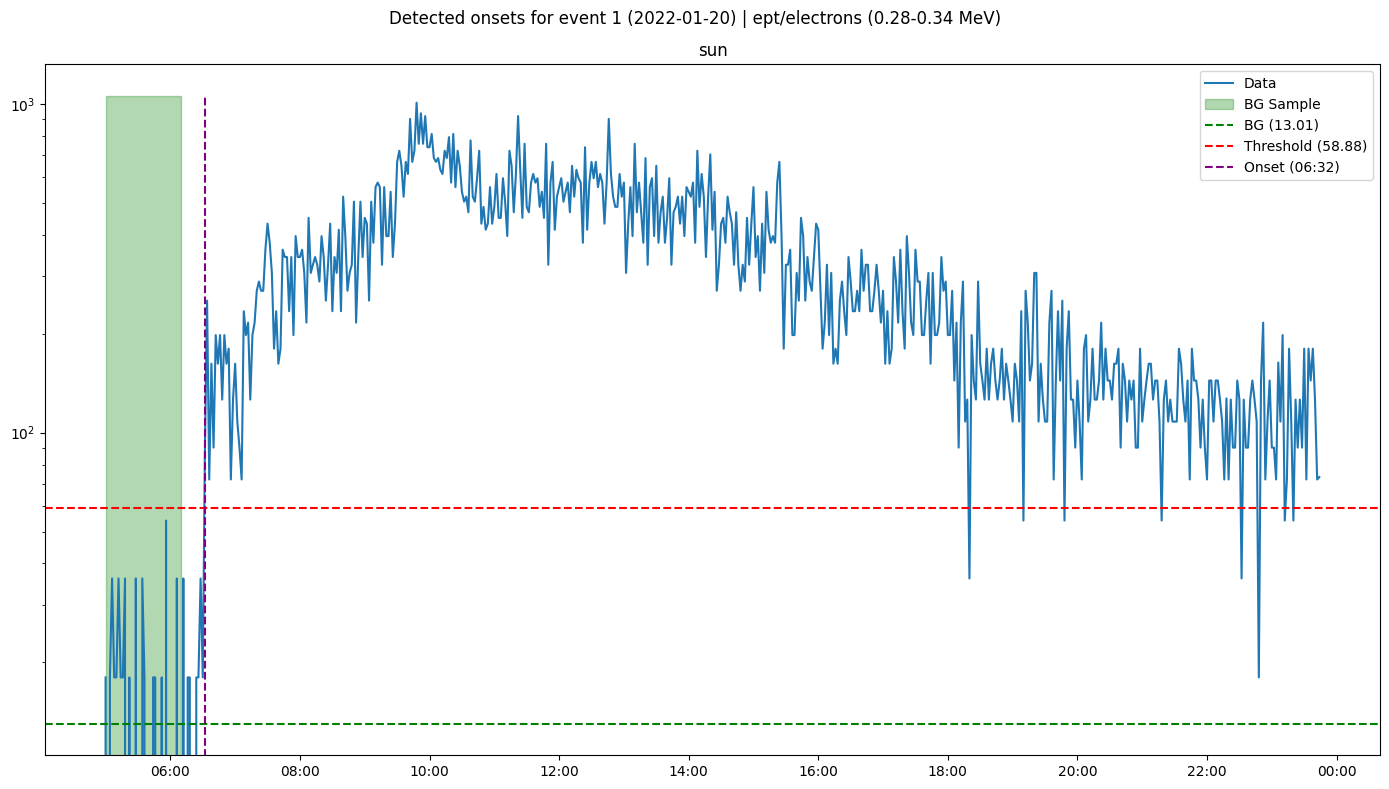

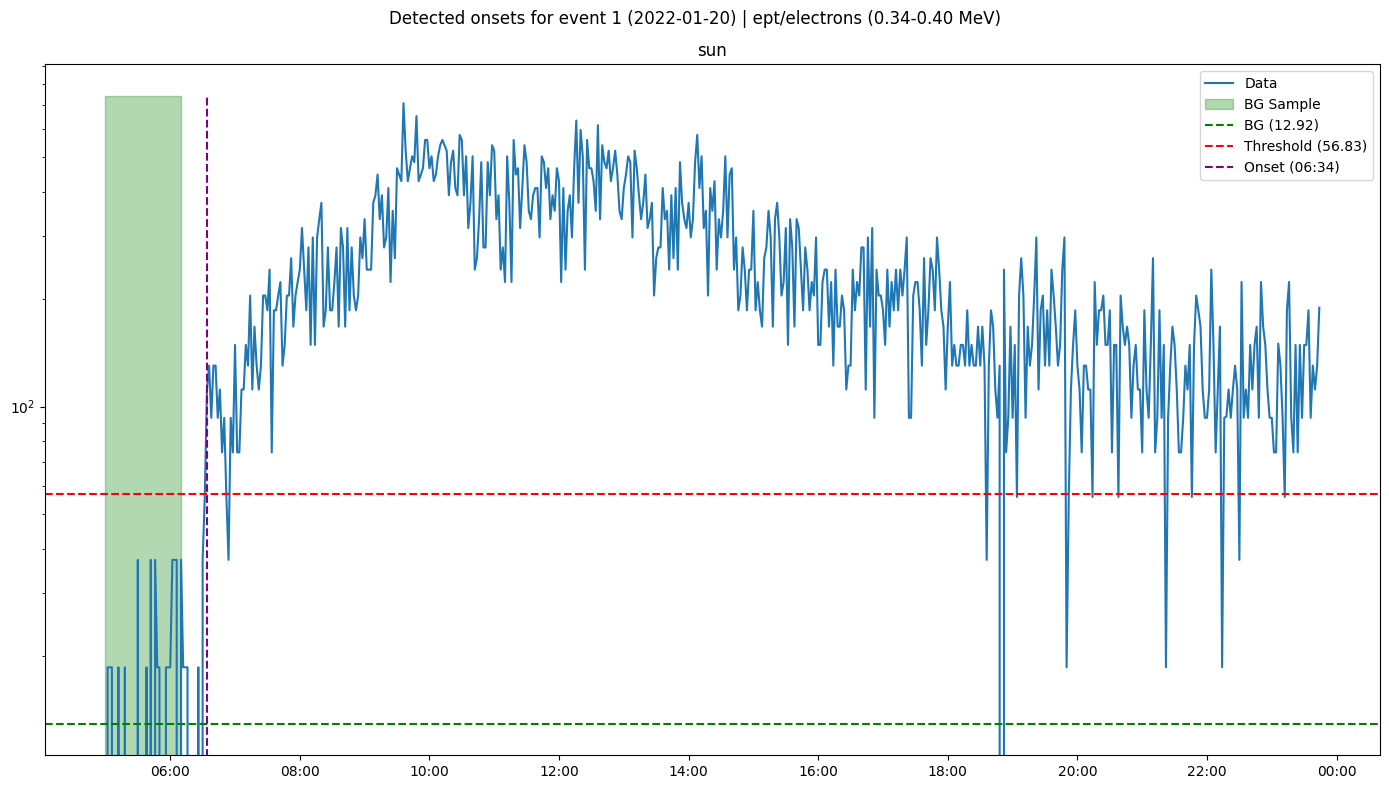

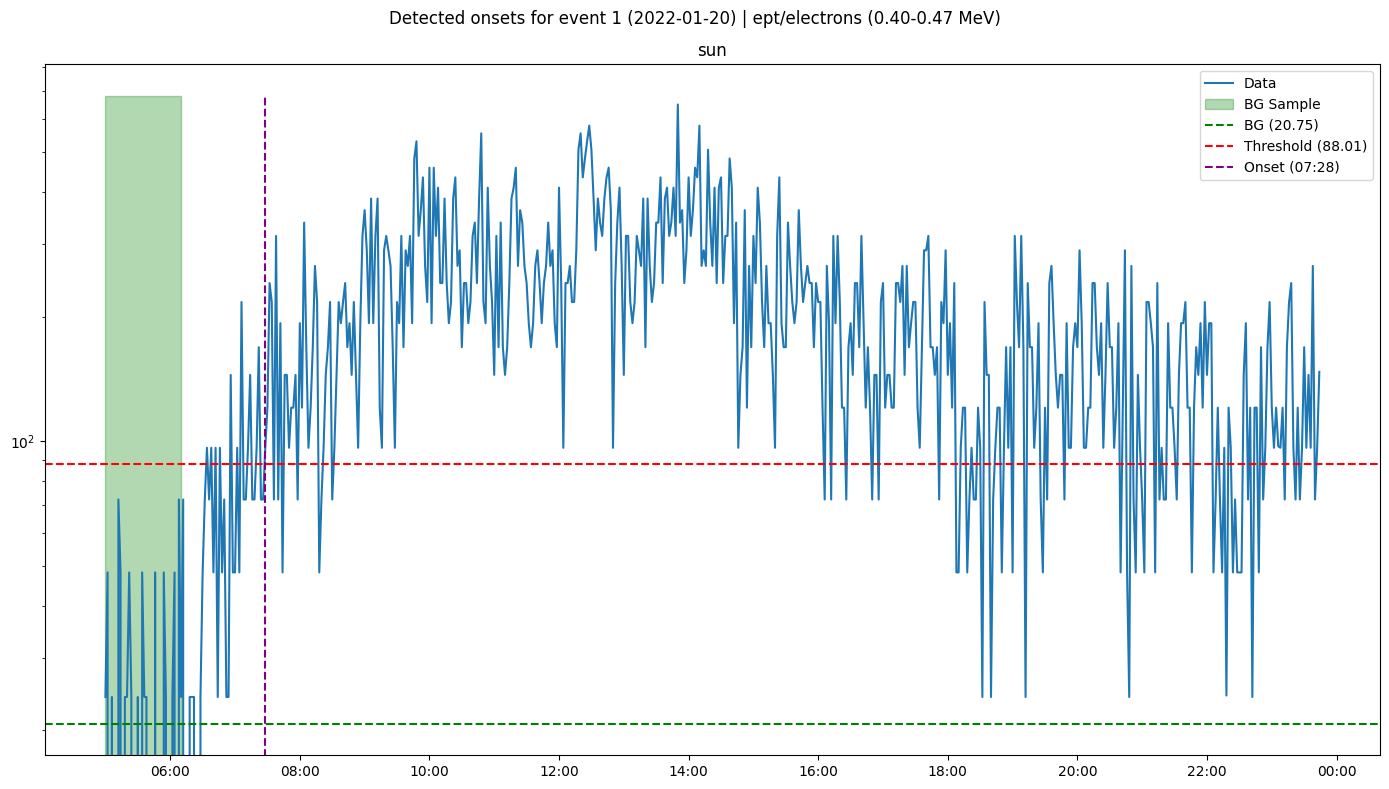

In [62]:
from math import ceil
from ipywidgets import widgets, VBox, HBox
from matplotlib import pyplot as plt
from matplotlib import dates as mdates

time_formatter = mdates.DateFormatter("%H:%M")
for event_no, event in vda.df_grouped.groupby(level=0):
    temp_df = event.droplevel(0)
    for sensor, particles in vda.parameters.sensors_particles.items():
        for particle in particles:
            if particle == "protons":
                particle_prefix = vda.PROTON_COLUMN_PREFIX
            elif particle == "electrons":
                particle_prefix = vda.ELECTRON_COLUMN_PREFIX
            columns = temp_df[sensor][particle][vda.parameters.viewings[0]][particle_prefix].columns
            for column in columns:
                onset_found = False
                nplots = len(vda.parameters.viewings)
                ncols = 3
                if nplots <= ncols:
                    nrows = 1
                    ncols = nplots
                else:
                    nrows = ceil(nplots/ncols)
                fig, axs = plt.subplots(nrows,
                                        ncols,
                                        figsize=(14, 8))
                try:
                    axs_flat = axs.flatten()
                except AttributeError:
                    axs_flat = [axs]
                for ax in axs_flat[len(vda.parameters.viewings):]:
                    ax.axis("off")
                for ax, viewing in zip(axs_flat, vda.parameters.viewings):
                    ax.set_title(viewing)
                    try:
                        onset_results = vda.df_onsets_existing.loc[(event_no,
                                                                    sensor,
                                                                    particle,
                                                                    viewing,
                                                                    particle_prefix,
                                                                    column)]
                        onset_found = True
                    except KeyError:
                        continue

                    ax.plot(temp_df[sensor][particle][viewing][particle_prefix][column].fillna(0).ffill(), label="Data")
                    xlim = ax.get_xlim()
                    ylim = ax.get_ylim()
                    ax.fill_betweenx([0, ylim[1]],
                                     onset_results["Background Start"],
                                     onset_results["Background End"],
                                     color="green",
                                     alpha=0.3,
                                     label="BG Sample")
                    ax.hlines(onset_results["Method Specific"]["bg_level"],
                              xlim[0],
                              xlim[1],
                              color="green",
                              linestyles="dashed",
                              label=f'BG ({onset_results["Method Specific"]["bg_level"]:.2f})')
                    ax.hlines(onset_results["Method Specific"]["threshold"],
                              xlim[0],
                              xlim[1],
                              color="red",
                              linestyles="dashed",
                              label=f'Threshold ({onset_results["Method Specific"]["threshold"]:.2f})')
                    ax.vlines(onset_results["Onset Time"],
                              0,
                              ylim[1],
                              color="purple",
                              linestyles="dashed",
                              label=f'Onset ({onset_results["Onset Time"].strftime("%H:%M")})')

                    ax.set_xlim(xlim)
                    ax.xaxis.set_major_formatter(time_formatter)
                    # ax.set_ylim(top=ylim[1])
                    ax.set_yscale("log")

                    # ax.legend(loc="upper left")
                    ax.legend()
                
                if not onset_found:
                    plt.close()
                    continue

                if "-" in column:
                    channels = column.split("-")
                    low_energy_key = channels[0]
                    high_energy_key = channels[1]
                else:
                    low_energy_key = column
                    high_energy_key = column
                energy_range_str = f"{vda.df_energies.loc[(sensor, low_energy_key), 'Low Energy']:.2f}-{vda.df_energies.loc[(sensor, high_energy_key), 'High Energy']:.2f}"
                
                twgt = widgets.Label(
                    value=f"Event {event_no} ({temp_df.index[0].to_pydatetime().strftime('%Y-%m-%d')}) | {sensor}/{particle} ({energy_range_str} MeV):",
                    style=vda_displayer.WIDGETS_STYLE,
                    layout=vda_displayer.WIDGETS_LAYOUT
                )
                wrb = widgets.RadioButtons(
                    options=["None"] + vda.parameters.viewings,
                    default="None",
                    orientation="horizontal",
                    style=vda_displayer.WIDGETS_STYLE,
                    layout=vda_displayer.WIDGETS_LAYOUT
                )
                wrb.observe(
                    lambda traitlet: vda_displayer._change_parameter_index(
                        "good_onsets",
                        f'{(parts := traitlet["owner"].description.split("/"))[0]}/{vda.parameters.AVAILABLE_SENSORS_PARTICLES[parts[0]].index(parts[1])}',
                        traitlet["new"],
                        "/",
                    ),
                    names="value",
                )
                display(HBox([twgt, wrb]))

                plt.suptitle(f"Detected onsets for event {event_no} ({temp_df.index[0].to_pydatetime().strftime('%Y-%m-%d')}) | {sensor}/{particle} ({energy_range_str} MeV)")
                plt.tight_layout()
                plt.show()

## <a id='toc1_3_'></a>[VDA](#toc0_)

### <a id='toc1_3_5_1_'></a>[Channels](#toc0_)

In [63]:
vda.construct_energy_channels_characteristics()

Geomagnetic Mean  \
sensor particle  channel                                               
het    protons   H_Flux_0-H_Flux_2                          7.731092   
                 H_Flux_3-H_Flux_5                          9.545584   
                 H_Flux_6-H_Flux_8                         11.257531   
                 H_Flux_9-H_Flux_11                        13.130042   
                 H_Flux_12-H_Flux_14                       16.306501   
                 H_Flux_15-H_Flux_17                       20.513020   
                 H_Flux_18-H_Flux_20                       26.089324   
                 H_Flux_21-H_Flux_23                       33.403234   
                 H_Flux_24-H_Flux_26                       43.124854   
                 H_Flux_27-H_Flux_29                       55.644559   
                 H_Flux_30-H_Flux_32                       71.773838   
                 H_Flux_33-H_Flux_35                       92.542074   
       electrons Electron_Flux_0-Electron_Flux_1            1.043251   
                 Electron_Flux_2-Electron_Flux_3            6.723900   
ept    electrons Electron_Flux_0-Electron_Flux_1            0.034184   
                 Electron_Flux_2-Electron_Flux_3            0.038647   
                 Electron_Flux_4-Electron_Flux_5            0.043644   
                 Electron_Flux_6-Electron_Flux_7            0.050307   
                 Electron_Flux_8-Electron_Flux_9            0.058660   
                 Electron_Flux_10-Electron_Flux_11          0.068508   
                 Electron_Flux_12-Electron_Flux_13          0.080017   
                 Electron_Flux_14-Electron_Flux_15          0.094053   
                 Electron_Flux_16-Electron_Flux_17          0.110993   
                 Electron_Flux_18-Electron_Flux_19          0.131466   
                 Electron_Flux_20-Electron_Flux_21          0.155569   
                 Electron_Flux_22-Electron_Flux_23          0.183987   
                 Electron_Flux_24-Electron_Flux_25          0.218338   
                 Electron_Flux_26-Electron_Flux_27          0.259333   
                 Electron_Flux_28-Electron_Flux_29          0.308012   
                 Electron_Flux_30-Electron_Flux_31          0.366071   
                 Electron_Flux_32-Electron_Flux_33          0.435110   

                                                    Inverse Beta  
sensor particle  channel                                          
het    protons   H_Flux_0-H_Flux_2                      7.837897  
                 H_Flux_3-H_Flux_5                      7.063857  
                 H_Flux_6-H_Flux_8                      6.513408  
                 H_Flux_9-H_Flux_11                     6.040002  
                 H_Flux_12-H_Flux_14                    5.433412  
                 H_Flux_15-H_Flux_17                    4.860330  
                 H_Flux_18-H_Flux_20                    4.328430  
                 H_Flux_21-H_Flux_23                    3.846943  
                 H_Flux_24-H_Flux_26                    3.410886  
                 H_Flux_27-H_Flux_29                    3.031192  
                 H_Flux_30-H_Flux_32                    2.701019  
                 H_Flux_33-H_Flux_35                    2.414782  
       electrons Electron_Flux_0-Electron_Flux_1        1.058864  
                 Electron_Flux_2-Electron_Flux_3        1.002504  
ept    electrons Electron_Flux_0-Electron_Flux_1        2.869196  
                 Electron_Flux_2-Electron_Flux_3        2.714819  
                 Electron_Flux_4-Electron_Flux_5        2.571842  
                 Electron_Flux_6-Electron_Flux_7        2.416732  
                 Electron_Flux_8-Electron_Flux_9        2.262564  
                 Electron_Flux_10-Electron_Flux_11      2.120184  
                 Electron_Flux_12-Electron_Flux_13      1.990284  
                 Electron_Flux_14-Electron_Flux_15      1.867518  
                 Electron_Flux_16-Electron_Flux_17      1.753979  


### <a id='toc1_3_5_2_'></a>[Spacecraft](#toc0_)

In [64]:
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7fb05a57b130>

In [65]:
vda.define_spacecraft_parameters()

/home/liadlow/Development/Work/NOA/Projects/SPEARHEAD/tools/VDA/venv_vda_tool/lib/python3.10/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

['2020-02-10 04:55:49.670' '2030-11-20 04:06:35.152']


/home/liadlow/Development/Work/NOA/Projects/SPEARHEAD/tools/VDA/venv_vda_tool/lib/python3.10/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/liadlow/Development/Work/NOA/Projects/SPEARHEAD/tools/VDA/venv_vda_tool/lib/python3.10/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


### <a id='toc1_3_5_3_'></a>[Plots](#toc0_)

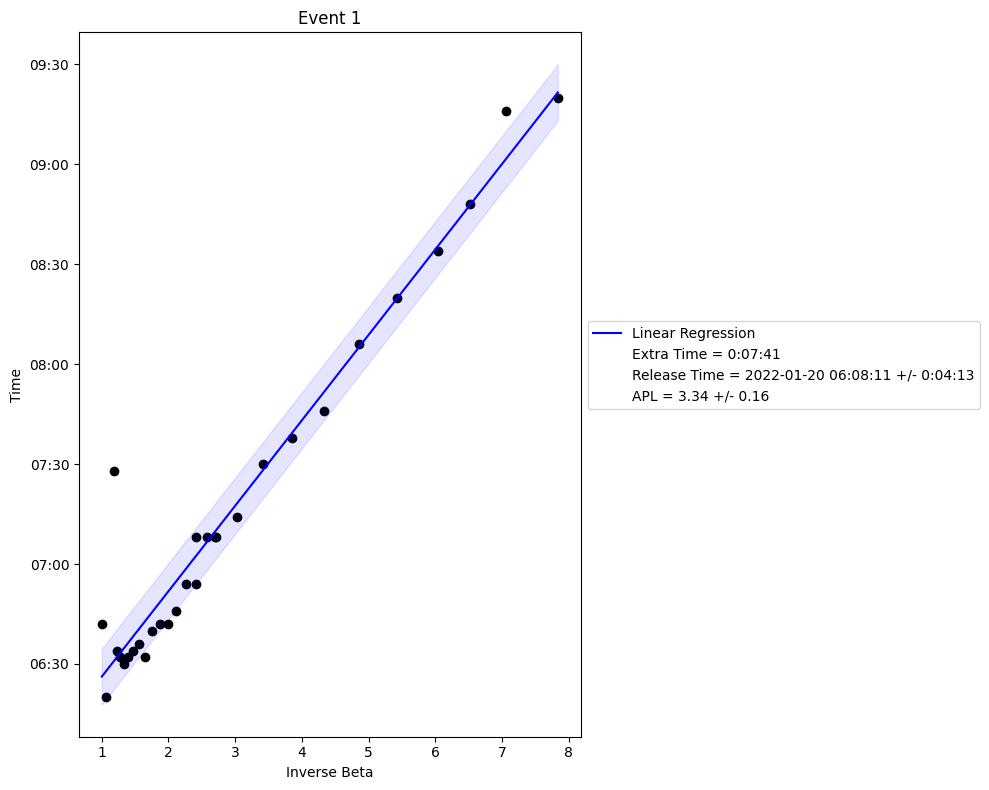

In [66]:
vda.plot()